In [1]:
import json
import codecs

In [2]:
import pandas as pd
import os
import regex as re

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [4]:
import python.dataset_analysis
from python.load import *
import json

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:740: FutureWarning: Possible nested set at position 8
  re.IGNORECASE | re.VERBOSE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2044: FutureWarning: Possible nested set at position 152
  re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


### Seleccion del corpus NEWSQA

In [17]:
DATASET_ROUTE = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\newsqa-master\newsqa-master\maluuba\newsqa/'

In [18]:
NEWSQA_TRAIN = DATASET_ROUTE + '/train_story_ids.csv'
NEWSQA_DEV = DATASET_ROUTE + '/dev_story_ids.csv'
NEWSQA_TEST = DATASET_ROUTE + '/test_story_ids.csv'

In [19]:
DATASET = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\cnn_stories\cnn\stories'
FILE_XLSX = r'C:\Users\larao_000\Desktop\TFM\jupyter\newsqa\newsqa-data-v1.csv' #'SQUAD-train_queries.xlsx' #'SQUAD-dev_queries.xlsx'

In [20]:
newsqa_df = pd.read_csv(FILE_XLSX)

In [21]:
newsqa_dev = pd.read_csv(NEWSQA_DEV)
newsqa_train = pd.read_csv(NEWSQA_TRAIN)
newsqa_test = pd.read_csv(NEWSQA_TEST)

In [22]:
dirname = DATASET_ROUTE
stories_requiring_extra_newline = pd.read_csv(os.path.join(dirname, 'stories_requiring_extra_newline.csv'))
stories_requiring_two_extra_newlines = pd.read_csv(os.path.join(dirname, 'stories_requiring_two_extra_newlines.csv'))
stories_to_decode_specially = pd.read_csv(os.path.join(dirname, 'stories_to_decode_specially.csv'))

stories_to_decode_specially['story_id'] = stories_to_decode_specially['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))
stories_requiring_two_extra_newlines['story_id'] = stories_requiring_two_extra_newlines['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))
stories_requiring_extra_newline['story_id'] = stories_requiring_extra_newline['story_id'].apply(lambda x: x.split('/')[-1].replace('\r',''))

In [23]:
stories_requiring_extra_newline.head()

story_id
0  002a083c3893b1fde734280b9eec28d428a02d2b.story
1  0032d07e91b8ce3d5f8ac313d799341df7556234.story
2  0033829349643e2964a8c3ce5fd997116ce43f7c.story
3  0036c48d80c270465bffced3e233fe39e5950431.story
4  00377ab9d3caafb18464c47d0535ae2781aeef15.story

In [24]:
stories_to_decode_specially = stories_to_decode_specially['story_id'].tolist()
stories_requiring_two_extra_newlines = stories_requiring_two_extra_newlines['story_id'].tolist()
stories_requiring_extra_newline = stories_requiring_extra_newline['story_id'].tolist()

In [25]:
import six
def preprocess_story(story_id, story_text, stories_requiring_extra_newline=stories_requiring_extra_newline, 
               stories_requiring_two_extra_newlines=stories_requiring_two_extra_newlines, 
               stories_to_decode_specially=stories_to_decode_specially):
    
    story_text = story_text.replace(u'\xe2\x80\xa2', u'\xe2\u20ac\xa2')
    story_text = story_text.replace(u'\xe2\x82\xac', u'\xe2\u201a\xac')
    story_text = story_text.replace('\r', '\n')
    story_lines = story_text.split('\n')
    
    if story_id in stories_to_decode_specially:
        story_text = u"".join(six.unichr(ord(c)) for c in story_text.strip())
    if story_id in stories_requiring_two_extra_newlines:
        story_text = '   '.join(story_lines)
    elif story_id in stories_requiring_extra_newline:
        story_text = '  '.join(story_lines)
    else:
        story_text = ' '.join(story_lines)
        
    return story_text

In [26]:
newsqa_df['story_id'] = newsqa_df['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_dev['story_id'] = newsqa_dev['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_test['story_id'] = newsqa_test['story_id'].apply(lambda x: x.split('/')[-1])
newsqa_train['story_id'] = newsqa_train['story_id'].apply(lambda x: x.split('/')[-1])

In [27]:
print(len(newsqa_dev))
print(len(newsqa_test))
print(len(newsqa_train))

638
637
11469


In [384]:
# id;query;answer;impossible;plausible;dataset;context;
# foco;query_ner;context_ner;answer_ner;query_pos;answer_pos;plausible_pos;context_pos;
# csarron/roberta-base-squad-v1;csarron/bert-base-uncased-squad-v1;phiyodr/roberta-large-finetuned-squad2;deepset/roberta-base-squad2;phiyodr/bert-base-finetuned-squad2;phiyodr/bert-large-finetuned-squad2;valhalla/t5-base-squad

In [28]:
for file in newsqa_test['story_id'].unique():
    #print(file)
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'test'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [29]:
for file in newsqa_dev['story_id'].unique():
    #print(file)
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'dev'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [30]:
newsqa_df.loc[newsqa_df['dataset'] == 'dev'].head(2)

story_id  \
8   d191e20468fc7675fcfa55c33fab1e65405740a0.story   
76  6e8382e61be49c936e00a8eea24377a687622967.story   

                                    question answer_char_ranges  \
8                       Iran criticizes who?   68:97|63:97|None   
76  What should you do with your own videos?          None|None   

    is_answer_absent is_question_bad validated_answers dataset  \
8           0.333333             0.0      {"63:97": 2}     dev   
76          0.500000             0.5               NaN     dev   

                                              context  
8   TEHRAN, Iran (CNN) -- Iran's parliament speake...  
76  (CNN) -- What could be more powerful than the ...

In [31]:
for file in newsqa_train['story_id'].unique():
    newsqa_df.loc[newsqa_df['story_id']==file, 'dataset'] = 'train'
    with codecs.open(DATASET+'/'+file, 'r', encoding='latin-1') as story_file:
        content_story = preprocess_story(file, story_file.read())
        newsqa_df.loc[newsqa_df['story_id']==file, 'context'] = content_story

In [32]:
newsqa_df.loc[newsqa_df['dataset'] == 'train'].head(2)

story_id  \
0  42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  c48228a52f26aca65c31fad273e66164f047f292.story   

                                    question     answer_char_ranges  \
0  What was the amount of children murdered?      294:297|None|None   
1             Where was one employee killed?  34:60|1610:1618|34:60   

   is_answer_absent is_question_bad          validated_answers dataset  \
0               0.0             0.0  {"none": 1, "294:297": 2}   train   
1               0.0             0.0                        NaN   train   

                                             context  
0  NEW DELHI, India (CNN) -- A high court in nort...  
1  (CNN) -- Fighting in the volatile Sudanese reg...

In [33]:
import json
import regex as re

In [34]:
def definitive_answer(answer_char_ranges, validated_answers, context_str):
    final_answer = ''
    final_plausible = ''
    valid_answers_dict = dict()
    
    if validated_answers and str(validated_answers) != 'NaN':
        valid_answers_dict = json.loads(validated_answers)
    elif answer_char_ranges:
        valid_answers = [x for x in answer_char_ranges.split('|') if x != 'None']
        valid_counts = [valid_answers.count(x) for x in valid_answers]
        valid_answers_dict = dict(zip(valid_answers, valid_counts))   

    # multiple fragments: 57:63,67:70|None|57:63,67:70 
    if len(valid_answers_dict.keys()) > 0:
        new_keys = []
        new_values = []
        for key_str in valid_answers_dict.keys():
            multiple = key_str.split(',')
            offsets = []
            if len(multiple) > 1:
                for offset_str in multiple:
                    offsets += [int(x) for x in offset_str.split(':')]
                new_keys.append(str(min(offsets))+':'+str(max(offsets)))
                new_values.append(valid_answers_dict[key_str])
            else:
                new_keys.append(key_str)
                new_values.append(valid_answers_dict[key_str])
        valid_answer_common = dict(zip(new_keys, new_values))
   
    if len(valid_answers_dict.keys()) > 0:
        valid_answer_common = sorted(valid_answers_dict, key=valid_answers_dict.get, reverse=True)[0]
        valid_answer_common = [int(x) for x in valid_answer_common.split(':') if x!= 'none' and x!= 'bad_question' and ',' not in x]
        if len(valid_answer_common) == 2:
            final_answer = context_str[valid_answer_common[0]:valid_answer_common[1]].strip()
        
    if len(valid_answers_dict.keys()) > 1:
        valid_plausible_common = sorted(valid_answers_dict, key=valid_answers_dict.get, reverse=True)[1]
        if not 'none' in valid_plausible_common:
            valid_plausible_common = [int(x) for x in valid_plausible_common.split(':') if x!= 'none' and x!= 'bad_question' and ',' not in x]
            if len(valid_plausible_common) == 2:
                final_plausible = context_str[valid_plausible_common[0]:valid_plausible_common[1]].strip()

    return final_answer, final_plausible

In [35]:
print(newsqa_df['question'][0])
definitive_answer(newsqa_df['answer_char_ranges'][0], newsqa_df['validated_answers'][0], 
                  preprocess_story(newsqa_df['story_id'][0], newsqa_df['context'][0]))

What was the amount of children murdered?


('19', '')

In [36]:
newsqa_df['answer_char_ranges'] = newsqa_df['answer_char_ranges'].fillna('')
newsqa_df['validated_answers'] = newsqa_df['validated_answers'].fillna('')
newsqa_df['context'] = newsqa_df['context'].fillna('')

In [37]:
print(newsqa_df['question'][1])
definitive_answer(newsqa_df['answer_char_ranges'][1], newsqa_df['validated_answers'][1], newsqa_df['context'][1])

Where was one employee killed?


('Sudanese region of Darfur', 'Seleia,')

In [38]:
newsqa_df['answer'] = newsqa_df[['answer_char_ranges', 'validated_answers', 'context']].apply(lambda x: definitive_answer(x[0], x[1], x[2])[0], axis=1)
newsqa_df['plausible'] = newsqa_df[['answer_char_ranges', 'validated_answers', 'context']].apply(lambda x: definitive_answer(x[0], x[1], x[2])[1], axis=1)

In [39]:
newsqa_df['id'] = newsqa_df.index.astype(str) + '-' + newsqa_df['story_id']
newsqa_df['query'] = newsqa_df['question']

In [40]:
newsqa_df['is_answer_absent'] = newsqa_df['is_answer_absent'].astype(float)

In [41]:
newsqa_df['is_question_bad_2'] = newsqa_df['is_question_bad'].apply(lambda x: x.replace('?','0.1'))
newsqa_df['is_question_bad_2'].value_counts()
newsqa_df['is_question_bad_2'] = newsqa_df['is_question_bad_2'].astype(float)

In [44]:
newsqa_df['impossible'] = (newsqa_df['is_answer_absent'] + newsqa_df['is_question_bad_2']) > 0

In [45]:
newsqa_df.head(2)

story_id  \
0  42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  c48228a52f26aca65c31fad273e66164f047f292.story   

                                    question     answer_char_ranges  \
0  What was the amount of children murdered?      294:297|None|None   
1             Where was one employee killed?  34:60|1610:1618|34:60   

   is_answer_absent is_question_bad          validated_answers dataset  \
0               0.0             0.0  {"none": 1, "294:297": 2}   train   
1               0.0             0.0                              train   

                                             context  \
0  NEW DELHI, India (CNN) -- A high court in nort...   
1  (CNN) -- Fighting in the volatile Sudanese reg...   

                      answer plausible  \
0                         19             
1  Sudanese region of Darfur   Seleia,   

                                                 id  \
0  0-42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  1-c48228a52f26aca65c31fad273e66164f047f292.story   

                                       query  is_question_bad_2  impossible  
0  What was the amount of children murdered?                0.0       False  
1             Where was one employee killed?                0.0       False

In [46]:
newsqa_df['impossible'].value_counts()

False    63672
True     55961
Name: impossible, dtype: int64

In [47]:
newsqa_df.to_excel('NEWSQA.xlsx', index=False)

# PLN

In [3]:
newsqa_df = pd.read_excel('NEWSQA.xlsx')

### POSTagging

In [48]:
# https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/
import treetaggerwrapper

In [49]:
tagger = treetaggerwrapper.TreeTagger(TAGLANG='en', TAGDIR='C:\\Users\\larao_000\\Documents\\nlp\\tree-tagger-windows-3.2.3\\TreeTagger\\')

In [50]:
def pos_tagging(text, max_length=1000):
    results = []
    for i in range(0, len(text), max_length):
        partial_text = text[i:i+max_length]
        tags = tagger.tag_text(partial_text)
        results += treetaggerwrapper.make_tags(tags)
    return results

In [51]:
newsqa_df['query_pos'] = None
newsqa_df['answer_pos'] = None
newsqa_df['plausible_pos'] = None
newsqa_df['context_pos'] = None

In [52]:
newsqa_df['query'] = newsqa_df['query'].fillna('')
newsqa_df['answer'] = newsqa_df['answer'].fillna('')
newsqa_df['plausible'] = newsqa_df['plausible'].fillna('')
newsqa_df['context'] = newsqa_df['context'].fillna('')

In [53]:
print(newsqa_df['query'][0])
print(tagger.tag_text(newsqa_df['query'][0]))
print(pos_tagging(newsqa_df['query'][0]))

What was the amount of children murdered?
['What\tWP\twhat', 'was\tVBD\tbe', 'the\tDT\tthe', 'amount\tNN\tamount', 'of\tIN\tof', 'children\tNNS\tchild', 'murdered\tVVN\tmurder', '?\tSENT\t?']
[Tag(word='What', pos='WP', lemma='what'), Tag(word='was', pos='VBD', lemma='be'), Tag(word='the', pos='DT', lemma='the'), Tag(word='amount', pos='NN', lemma='amount'), Tag(word='of', pos='IN', lemma='of'), Tag(word='children', pos='NNS', lemma='child'), Tag(word='murdered', pos='VVN', lemma='murder'), Tag(word='?', pos='SENT', lemma='?')]


In [54]:
newsqa_df['query_pos'] = newsqa_df['query'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [55]:
newsqa_df['answer_pos'] = newsqa_df['answer'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [56]:
newsqa_df['plausible_pos'] = newsqa_df['plausible'].apply(lambda x: treetaggerwrapper.make_tags(tagger.tag_text(x)))

In [57]:
context_list = newsqa_df.loc[newsqa_df['context_pos'].isna(), 'context'].unique()
for context in context_list:
    print(len(newsqa_df.loc[newsqa_df['context'] == context, 'context_pos']))
    ner_values = pos_tagging(context)
    newsqa_df.loc[newsqa_df['context'] == context, 'context_pos'] = str(ner_values)
    print(sum(newsqa_df['context_pos'].isna()))

9
119624
9
119615
9
119606
17
119589
9
119580
9
119571
9
119562
12
119550
12
119538
9
119529
9
119520
7
119513
9
119504
9
119495
9
119486
7
119479
9
119470
9
119461
9
119452
18
119434
8
119426
9
119417
9
119408
9
119399
11
119388
9
119379
9
119370
9
119361
27
119334
9
119325
9
119316
11
119305
12
119293
8
119285
9
119276
18
119258
28
119230
9
119221
9
119212
9
119203
9
119194
8
119186
21
119165
9
119156
8
119148
9
119139
9
119130
12
119118
8
119110
18
119092
9
119083
9
119074
9
119065
12
119053
9
119044
8
119036
9
119027
9
119018
12
119006
9
118997
18
118979
9
118970
9
118961
11
118950
9
118941
9
118932
9
118923
12
118911
8
118903
8
118895
9
118886
9
118877
9
118868
9
118859
9
118850
11
118839
11
118828
8
118820
9
118811
9
118802
9
118793
9
118784
9
118775
12
118763
9
118754
9
118745
9
118736
12
118724
8
118716
9
118707
8
118699
9
118690
15
118675
29
118646
9
118637
11
118626
8
118618
26
118592
9
118583
12
118571
18
118553
29
118524
9
118515
12
118503
9
118494
30
118464
7
118457
8
1184

109993
9
109984
9
109975
18
109957
12
109945
9
109936
9
109927
18
109909
9
109900
9
109891
9
109882
9
109873
12
109861
9
109852
9
109843
8
109835
9
109826
9
109817
9
109808
9
109799
9
109790
9
109781
8
109773
9
109764
11
109753
9
109744
9
109735
8
109727
8
109719
9
109710
9
109701
9
109692
26
109666
9
109657
9
109648
9
109639
9
109630
12
109618
12
109606
12
109594
9
109585
23
109562
8
109554
18
109536
9
109527
9
109518
8
109510
9
109501
9
109492
9
109483
9
109474
9
109465
9
109456
9
109447
12
109435
12
109423
9
109414
9
109405
9
109396
8
109388
19
109369
9
109360
11
109349
9
109340
12
109328
28
109300
9
109291
9
109282
9
109273
9
109264
12
109252
9
109243
9
109234
9
109225
10
109215
9
109206
11
109195
11
109184
9
109175
9
109166
12
109154
9
109145
18
109127
9
109118
8
109110
9
109101
12
109089
9
109080
8
109072
12
109060
12
109048
9
109039
9
109030
9
109021
12
109009
9
109000
8
108992
9
108983
9
108974
9
108965
9
108956
9
108947
12
108935
29
108906
9
108897
9
108888
9
108879
9
108870
9

100361
9
100352
18
100334
12
100322
9
100313
9
100304
16
100288
21
100267
12
100255
9
100246
8
100238
17
100221
9
100212
9
100203
8
100195
12
100183
9
100174
9
100165
9
100156
9
100147
9
100138
9
100129
12
100117
9
100108
9
100099
12
100087
9
100078
9
100069
9
100060
9
100051
9
100042
9
100033
9
100024
9
100015
9
100006
9
99997
12
99985
8
99977
9
99968
9
99959
12
99947
9
99938
12
99926
9
99917
9
99908
9
99899
9
99890
9
99881
18
99863
18
99845
9
99836
9
99827
9
99818
11
99807
18
99789
9
99780
9
99771
17
99754
10
99744
9
99735
9
99726
8
99718
9
99709
6
99703
8
99695
12
99683
9
99674
9
99665
9
99656
9
99647
9
99638
9
99629
9
99620
9
99611
9
99602
18
99584
30
99554
17
99537
9
99528
9
99519
9
99510
9
99501
9
99492
11
99481
12
99469
9
99460
9
99451
12
99439
11
99428
9
99419
9
99410
9
99401
9
99392
8
99384
8
99376
9
99367
9
99358
9
99349
9
99340
9
99331
12
99319
9
99310
9
99301
8
99293
9
99284
9
99275
9
99266
10
99256
9
99247
9
99238
9
99229
9
99220
9
99211
9
99202
9
99193
9
99184
9
99175
12


89894
9
89885
12
89873
9
89864
9
89855
12
89843
9
89834
9
89825
24
89801
9
89792
9
89783
9
89774
9
89765
29
89736
11
89725
10
89715
9
89706
9
89697
9
89688
21
89667
12
89655
8
89647
9
89638
9
89629
9
89620
12
89608
8
89600
12
89588
9
89579
9
89570
18
89552
8
89544
9
89535
9
89526
28
89498
9
89489
30
89459
9
89450
9
89441
9
89432
17
89415
12
89403
9
89394
9
89385
9
89376
9
89367
12
89355
11
89344
28
89316
9
89307
9
89298
9
89289
7
89282
12
89270
9
89261
8
89253
9
89244
9
89235
8
89227
8
89219
21
89198
18
89180
9
89171
9
89162
12
89150
9
89141
9
89132
9
89123
9
89114
9
89105
12
89093
18
89075
11
89064
9
89055
9
89046
9
89037
9
89028
9
89019
9
89010
8
89002
9
88993
17
88976
9
88967
11
88956
9
88947
8
88939
9
88930
9
88921
9
88912
8
88904
9
88895
9
88886
9
88877
9
88868
9
88859
18
88841
9
88832
8
88824
11
88813
9
88804
9
88795
9
88786
9
88777
9
88768
9
88759
9
88750
9
88741
9
88732
9
88723
9
88714
9
88705
9
88696
9
88687
9
88678
9
88669
9
88660
12
88648
9
88639
9
88630
9
88621
9
88612
9
88

69294
9
69285
9
69276
18
69258
11
69247
8
69239
9
69230
7
69223
8
69215
9
69206
9
69197
9
69188
9
69179
9
69170
9
69161
12
69149
9
69140
8
69132
9
69123
21
69102
9
69093
9
69084
9
69075
9
69066
9
69057
9
69048
9
69039
8
69031
9
69022
9
69013
9
69004
9
68995
9
68986
9
68977
8
68969
9
68960
9
68951
9
68942
9
68933
8
68925
9
68916
9
68907
16
68891
9
68882
9
68873
9
68864
9
68855
15
68840
12
68828
18
68810
9
68801
9
68792
9
68783
8
68775
9
68766
9
68757
9
68748
9
68739
9
68730
9
68721
9
68712
9
68703
9
68694
9
68685
9
68676
18
68658
8
68650
9
68641
9
68632
9
68623
12
68611
9
68602
8
68594
9
68585
9
68576
9
68567
9
68558
9
68549
12
68537
9
68528
9
68519
9
68510
9
68501
9
68492
12
68480
9
68471
9
68462
9
68453
12
68441
8
68433
9
68424
9
68415
9
68406
12
68394
9
68385
9
68376
8
68368
9
68359
11
68348
9
68339
9
68330
9
68321
17
68304
9
68295
9
68286
9
68277
9
68268
9
68259
9
68250
16
68234
29
68205
10
68195
18
68177
9
68168
8
68160
7
68153
22
68131
8
68123
8
68115
9
68106
9
68097
9
68088
9
680

59481
12
59469
18
59451
12
59439
9
59430
9
59421
8
59413
9
59404
9
59395
9
59386
9
59377
9
59368
9
59359
8
59351
9
59342
9
59333
8
59325
9
59316
9
59307
9
59298
9
59289
8
59281
9
59272
9
59263
9
59254
9
59245
8
59237
8
59229
9
59220
9
59211
9
59202
8
59194
9
59185
9
59176
9
59167
9
59158
9
59149
9
59140
8
59132
9
59123
9
59114
9
59105
23
59082
12
59070
9
59061
9
59052
8
59044
24
59020
9
59011
9
59002
9
58993
9
58984
12
58972
9
58963
9
58954
9
58945
9
58936
9
58927
9
58918
9
58909
9
58900
25
58875
9
58866
9
58857
8
58849
9
58840
9
58831
18
58813
9
58804
9
58795
9
58786
15
58771
9
58762
10
58752
9
58743
9
58734
17
58717
12
58705
9
58696
12
58684
9
58675
9
58666
9
58657
12
58645
18
58627
9
58618
9
58609
9
58600
8
58592
9
58583
9
58574
18
58556
8
58548
9
58539
9
58530
12
58518
9
58509
9
58500
27
58473
9
58464
9
58455
9
58446
9
58437
12
58425
9
58416
18
58398
9
58389
9
58380
10
58370
18
58352
12
58340
12
58328
9
58319
9
58310
12
58298
9
58289
9
58280
9
58271
12
58259
9
58250
18
58232
9
5822

49623
18
49605
8
49597
10
49587
9
49578
9
49569
9
49560
9
49551
9
49542
9
49533
8
49525
9
49516
9
49507
9
49498
9
49489
9
49480
12
49468
9
49459
9
49450
9
49441
9
49432
9
49423
11
49412
9
49403
9
49394
17
49377
9
49368
9
49359
8
49351
8
49343
9
49334
9
49325
9
49316
9
49307
11
49296
8
49288
9
49279
9
49270
9
49261
9
49252
9
49243
9
49234
18
49216
17
49199
11
49188
9
49179
8
49171
8
49163
9
49154
11
49143
9
49134
9
49125
9
49116
9
49107
9
49098
9
49089
12
49077
9
49068
9
49059
18
49041
9
49032
8
49024
8
49016
9
49007
9
48998
7
48991
9
48982
12
48970
9
48961
9
48952
9
48943
9
48934
8
48926
9
48917
9
48908
12
48896
9
48887
9
48878
8
48870
9
48861
9
48852
9
48843
9
48834
9
48825
9
48816
9
48807
9
48798
9
48789
14
48775
9
48766
8
48758
12
48746
9
48737
9
48728
9
48719
18
48701
9
48692
6
48686
9
48677
9
48668
9
48659
9
48650
9
48641
9
48632
11
48621
9
48612
9
48603
9
48594
9
48585
12
48573
9
48564
9
48555
9
48546
9
48537
8
48529
9
48520
9
48511
8
48503
9
48494
12
48482
9
48473
9
48464
11
484

39901
9
39892
9
39883
8
39875
9
39866
9
39857
9
39848
9
39839
9
39830
9
39821
9
39812
9
39803
28
39775
11
39764
9
39755
9
39746
9
39737
9
39728
9
39719
18
39701
9
39692
8
39684
11
39673
9
39664
8
39656
12
39644
9
39635
8
39627
10
39617
9
39608
9
39599
9
39590
8
39582
27
39555
12
39543
9
39534
9
39525
9
39516
9
39507
8
39499
9
39490
12
39478
9
39469
9
39460
9
39451
9
39442
9
39433
9
39424
9
39415
12
39403
18
39385
9
39376
9
39367
9
39358
9
39349
8
39341
9
39332
12
39320
9
39311
9
39302
8
39294
9
39285
8
39277
9
39268
9
39259
9
39250
12
39238
9
39229
9
39220
8
39212
9
39203
9
39194
8
39186
9
39177
9
39168
9
39159
9
39150
9
39141
9
39132
9
39123
9
39114
8
39106
21
39085
9
39076
9
39067
8
39059
9
39050
9
39041
8
39033
6
39027
9
39018
9
39009
12
38997
12
38985
8
38977
8
38969
11
38958
9
38949
8
38941
8
38933
8
38925
8
38917
9
38908
9
38899
8
38891
9
38882
9
38873
8
38865
9
38856
9
38847
9
38838
9
38829
12
38817
9
38808
9
38799
15
38784
9
38775
9
38766
9
38757
9
38748
9
38739
9
38730
12
3871

30389
9
30380
12
30368
9
30359
9
30350
11
30339
18
30321
8
30313
12
30301
9
30292
9
30283
9
30274
9
30265
9
30256
9
30247
8
30239
8
30231
9
30222
9
30213
9
30204
9
30195
9
30186
11
30175
9
30166
9
30157
12
30145
7
30138
9
30129
9
30120
9
30111
8
30103
9
30094
12
30082
9
30073
9
30064
9
30055
9
30046
8
30038
11
30027
8
30019
9
30010
9
30001
9
29992
9
29983
9
29974
9
29965
9
29956
9
29947
9
29938
9
29929
12
29917
9
29908
9
29899
9
29890
9
29881
8
29873
9
29864
12
29852
9
29843
9
29834
8
29826
9
29817
9
29808
9
29799
9
29790
9
29781
9
29772
9
29763
9
29754
9
29745
9
29736
9
29727
9
29718
9
29709
9
29700
9
29691
8
29683
9
29674
8
29666
9
29657
8
29649
9
29640
9
29631
8
29623
9
29614
8
29606
9
29597
9
29588
9
29579
9
29570
9
29561
12
29549
8
29541
9
29532
9
29523
8
29515
9
29506
9
29497
9
29488
9
29479
9
29470
12
29458
9
29449
9
29440
9
29431
18
29413
9
29404
9
29395
23
29372
8
29364
18
29346
9
29337
12
29325
9
29316
9
29307
9
29298
9
29289
9
29280
9
29271
9
29262
9
29253
11
29242
9
29233
8

9
20909
9
20900
12
20888
9
20879
9
20870
9
20861
7
20854
9
20845
8
20837
8
20829
9
20820
9
20811
8
20803
9
20794
12
20782
9
20773
9
20764
9
20755
9
20746
9
20737
9
20728
9
20719
18
20701
9
20692
9
20683
8
20675
9
20666
12
20654
9
20645
7
20638
9
20629
9
20620
9
20611
8
20603
9
20594
9
20585
9
20576
9
20567
9
20558
7
20551
9
20542
9
20533
9
20524
18
20506
6
20500
8
20492
8
20484
9
20475
6
20469
9
20460
8
20452
9
20443
8
20435
9
20426
9
20417
9
20408
9
20399
6
20393
9
20384
9
20375
9
20366
12
20354
9
20345
9
20336
12
20324
9
20315
9
20306
9
20297
9
20288
12
20276
7
20269
9
20260
9
20251
9
20242
9
20233
9
20224
18
20206
9
20197
9
20188
9
20179
9
20170
9
20161
9
20152
9
20143
9
20134
9
20125
9
20116
9
20107
9
20098
9
20089
9
20080
7
20073
9
20064
9
20055
9
20046
8
20038
9
20029
12
20017
9
20008
9
19999
9
19990
9
19981
9
19972
9
19963
9
19954
9
19945
9
19936
9
19927
9
19918
7
19911
9
19902
9
19893
9
19884
9
19875
9
19866
9
19857
9
19848
9
19839
8
19831
9
19822
9
19813
8
19805
8
19797
9
1978

11631
9
11622
9
11613
9
11604
9
11595
9
11586
9
11577
17
11560
9
11551
9
11542
9
11533
9
11524
9
11515
9
11506
9
11497
9
11488
9
11479
12
11467
9
11458
9
11449
9
11440
9
11431
9
11422
9
11413
9
11404
12
11392
6
11386
8
11378
9
11369
8
11361
9
11352
10
11342
9
11333
9
11324
12
11312
9
11303
9
11294
9
11285
9
11276
9
11267
9
11258
9
11249
9
11240
9
11231
9
11222
9
11213
9
11204
11
11193
9
11184
6
11178
8
11170
9
11161
18
11143
9
11134
9
11125
9
11116
9
11107
8
11099
9
11090
9
11081
9
11072
9
11063
9
11054
9
11045
9
11036
9
11027
9
11018
9
11009
8
11001
12
10989
9
10980
9
10971
8
10963
9
10954
8
10946
8
10938
9
10929
9
10920
8
10912
9
10903
11
10892
9
10883
9
10874
8
10866
9
10857
9
10848
8
10840
9
10831
9
10822
9
10813
9
10804
9
10795
9
10786
9
10777
12
10765
9
10756
9
10747
9
10738
7
10731
8
10723
8
10715
9
10706
9
10697
9
10688
9
10679
9
10670
8
10662
9
10653
9
10644
9
10635
9
10626
9
10617
9
10608
9
10599
9
10590
18
10572
9
10563
8
10555
9
10546
9
10537
9
10528
9
10519
9
10510
9
10501

8
1372
9
1363
10
1353
9
1344
7
1337
5
1332
8
1324
9
1315
8
1307
9
1298
9
1289
8
1281
9
1272
9
1263
7
1256
9
1247
18
1229
9
1220
9
1211
9
1202
9
1193
9
1184
7
1177
9
1168
12
1156
8
1148
9
1139
9
1130
9
1121
9
1112
9
1103
9
1094
8
1086
9
1077
11
1066
9
1057
9
1048
9
1039
12
1027
9
1018
9
1009
8
1001
8
993
9
984
9
975
9
966
9
957
8
949
9
940
9
931
9
922
9
913
9
904
9
895
9
886
10
876
12
864
9
855
9
846
9
837
9
828
9
819
7
812
9
803
9
794
9
785
9
776
8
768
7
761
9
752
9
743
9
734
9
725
9
716
9
707
9
698
9
689
6
683
9
674
8
666
9
657
9
648
9
639
9
630
8
622
9
613
9
604
9
595
9
586
9
577
9
568
9
559
9
550
9
541
7
534
9
525
9
516
8
508
8
500
9
491
9
482
8
474
9
465
6
459
9
450
7
443
9
434
7
427
7
420
9
411
8
403
12
391
9
382
9
373
9
364
8
356
9
347
9
338
9
329
8
321
7
314
8
306
7
299
11
288
9
279
9
270
9
261
9
252
9
243
9
234
9
225
9
216
9
207
8
199
9
190
7
183
8
175
8
167
9
158
8
150
7
143
9
134
8
126
9
117
7
110
6
104
9
95
9
86
9
77
8
69
8
61
9
52
9
43
3
40
3
37
7
30
8
22
3
19
8
11
8
3
3
0


In [58]:
informe_pd = newsqa_df[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_pos', 'answer_pos','plausible_pos', 'context_pos']] 

In [59]:
informe_pd.to_excel('POS-NEWSQA-all.xlsx', index=False)

### NER Stanford

In [60]:
from stanfordcorenlp import StanfordCoreNLP

In [61]:
# https://www.khalidalnajjar.com/setup-use-stanford-corenlp-server-python/
# https://stanfordnlp.github.io/CoreNLP/index.html#download
# https://stanfordnlp.github.io/stanfordnlp/corenlp_client.html
nlp = StanfordCoreNLP('http://localhost', port=9000, timeout=30000)
props = {'annotators': 'tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref,relation',
          'pipelineLanguage': 'en',
          'outputFormat': 'json'
        }

In [62]:
import re
def preprocess_text(text_str):
    regular_expr = re.compile('\n|\r|\t|\(|\)|\[|\]|:|\,|\;|"|\?|\-|\%')
    text_str = re.sub(regular_expr, ' ', text_str)
    token_list = text_str.split(' ')
    token_list = [element for element in token_list if element]
    return ' '.join(token_list)

In [63]:
def filter_ner_relevant(tuple_list):
    ner_dictionary = {}
    previous_ner = 'O'
    for element in tuple_list:
        if element[1] != 'O':
            if element[1] == previous_ner:
                ner_dictionary[element[1]][-1] += ' ' + element[0]
            elif element[1] in ner_dictionary.keys():
                ner_dictionary[element[1]].append(element[0])
            else:
                ner_dictionary[element[1]] = [element[0]]    
        previous_ner = element[1]
    return ner_dictionary

In [64]:
queries_pd = newsqa_df

In [65]:
queries_pd['query_processed'] = queries_pd['query'].apply(preprocess_text)

In [66]:
queries_pd['query_ner'] = queries_pd['query_processed'].apply(nlp.ner)

In [67]:
queries_pd['query_ner'] = queries_pd['query_ner'].apply(filter_ner_relevant)

In [68]:
queries_pd['context_proc'] = queries_pd['context'].apply(preprocess_text)

In [69]:
print(len(queries_pd['context_ner'].isna()))
for context in queries_pd['context_proc'].unique():
    print(len(queries_pd.loc[queries_pd['context_proc'] == context, 'context_ner']))
    ner_values = filter_ner_relevant(nlp.ner(context))
    queries_pd.loc[queries_pd['context_proc'] == context, 'context_ner'] = str(ner_values)
    print(sum(queries_pd['context_ner'].isna()))

119633
9
119624
9
119615
9
119606
17
119589
9
119580
9
119571
9
119562
12
119550
12
119538
9
119529
9
119520
7
119513
9
119504
9
119495
9
119486
7
119479
9
119470
9
119461
9
119452
18
119434
8
119426
9
119417
9
119408
18
119390
20
119370
9
119361
9
119352
9
119343
27
119316
9
119307
9
119298
11
119287
12
119275
8
119267
9
119258
18
119240
28
119212
9
119203
9
119194
21
119173
9
119164
8
119156
21
119135
9
119126
8
119118
9
119109
9
119100
12
119088
8
119080
18
119062
9
119053
9
119044
9
119035
12
119023
9
119014
8
119006
9
118997
9
118988
21
118967
9
118958
18
118940
9
118931
9
118922
11
118911
9
118902
9
118893
9
118884
12
118872
8
118864
8
118856
18
118838
9
118829
9
118820
9
118811
9
118802
11
118791
11
118780
8
118772
9
118763
9
118754
9
118745
9
118736
9
118727
12
118715
18
118697
9
118688
9
118679
12
118667
8
118659
9
118650
8
118642
9
118633
15
118618
29
118589
9
118580
11
118569
8
118561
37
118524
9
118515
12
118503
27
118476
29
118447
9
118438
12
118426
9
118417
42
118375
7
11

109612
9
109603
9
109594
9
109585
18
109567
12
109555
9
109546
9
109537
18
109519
9
109510
9
109501
9
109492
9
109483
12
109471
18
109453
9
109444
8
109436
9
109427
9
109418
9
109409
9
109400
9
109391
9
109382
8
109374
16
109358
11
109347
9
109338
9
109329
8
109321
17
109304
9
109295
9
109286
18
109268
26
109242
9
109233
9
109224
9
109215
9
109206
12
109194
12
109182
12
109170
9
109161
23
109138
8
109130
18
109112
9
109103
9
109094
17
109077
9
109068
9
109059
9
109050
9
109041
9
109032
9
109023
9
109014
12
109002
12
108990
9
108981
9
108972
9
108963
8
108955
19
108936
9
108927
11
108916
9
108907
12
108895
40
108855
9
108846
9
108837
9
108828
9
108819
12
108807
9
108798
9
108789
9
108780
10
108770
9
108761
11
108750
11
108739
9
108730
9
108721
12
108709
9
108700
18
108682
9
108673
17
108656
9
108647
12
108635
9
108626
8
108618
12
108606
12
108594
9
108585
9
108576
9
108567
12
108555
18
108537
8
108529
9
108520
9
108511
9
108502
9
108493
9
108484
12
108472
29
108443
9
108434
9
108425
9
1

99583
9
99574
8
99566
17
99549
9
99540
9
99531
8
99523
12
99511
9
99502
9
99493
9
99484
9
99475
9
99466
9
99457
12
99445
9
99436
9
99427
12
99415
9
99406
9
99397
18
99379
9
99370
9
99361
9
99352
9
99343
9
99334
9
99325
9
99316
12
99304
8
99296
9
99287
9
99278
12
99266
9
99257
12
99245
9
99236
9
99227
9
99218
9
99209
9
99200
27
99173
18
99155
9
99146
9
99137
9
99128
11
99117
18
99099
9
99090
9
99081
17
99064
10
99054
9
99045
9
99036
8
99028
9
99019
6
99013
8
99005
12
98993
9
98984
9
98975
9
98966
9
98957
9
98948
9
98939
9
98930
9
98921
9
98912
18
98894
30
98864
17
98847
9
98838
9
98829
9
98820
9
98811
9
98802
11
98791
12
98779
9
98770
9
98761
12
98749
11
98738
9
98729
9
98720
9
98711
9
98702
8
98694
8
98686
9
98677
9
98668
9
98659
9
98650
9
98641
12
98629
9
98620
9
98611
17
98594
9
98585
9
98576
9
98567
10
98557
9
98548
9
98539
9
98530
9
98521
9
98512
9
98503
9
98494
9
98485
9
98476
12
98464
9
98455
9
98446
9
98437
9
98428
12
98416
15
98401
9
98392
18
98374
17
98357
14
98343
9
98334
9
9

88781
10
88771
9
88762
9
88753
9
88744
21
88723
12
88711
8
88703
9
88694
9
88685
9
88676
12
88664
8
88656
12
88644
9
88635
9
88626
18
88608
8
88600
9
88591
9
88582
28
88554
9
88545
30
88515
9
88506
9
88497
9
88488
17
88471
12
88459
9
88450
9
88441
9
88432
9
88423
12
88411
11
88400
28
88372
9
88363
9
88354
9
88345
7
88338
12
88326
9
88317
8
88309
9
88300
9
88291
8
88283
17
88266
21
88245
18
88227
9
88218
9
88209
12
88197
9
88188
9
88179
9
88170
9
88161
9
88152
12
88140
18
88122
9
88113
9
88104
9
88095
9
88086
9
88077
9
88068
8
88060
9
88051
17
88034
9
88025
11
88014
9
88005
8
87997
9
87988
9
87979
9
87970
8
87962
9
87953
9
87944
9
87935
9
87926
9
87917
18
87899
9
87890
8
87882
11
87871
9
87862
9
87853
9
87844
9
87835
9
87826
9
87817
9
87808
9
87799
21
87778
9
87769
9
87760
9
87751
9
87742
9
87733
9
87724
9
87715
9
87706
12
87694
9
87685
9
87676
9
87667
9
87658
9
87649
9
87640
9
87631
9
87622
9
87613
9
87604
9
87595
9
87586
9
87577
9
87568
9
87559
9
87550
9
87541
27
87514
15
87499
23
874

78213
18
78195
9
78186
9
78177
15
78162
9
78153
9
78144
9
78135
9
78126
9
78117
9
78108
9
78099
18
78081
9
78072
8
78064
9
78055
9
78046
9
78037
9
78028
12
78016
12
78004
8
77996
9
77987
8
77979
24
77955
7
77948
9
77939
11
77928
9
77919
9
77910
18
77892
11
77881
12
77869
12
77857
9
77848
9
77839
9
77830
9
77821
9
77812
9
77803
12
77791
9
77782
9
77773
9
77764
9
77755
11
77744
9
77735
18
77717
9
77708
9
77699
9
77690
9
77681
9
77672
9
77663
9
77654
9
77645
9
77636
9
77627
9
77618
12
77606
9
77597
9
77588
8
77580
9
77571
9
77562
9
77553
9
77544
9
77535
18
77517
9
77508
18
77490
8
77482
8
77474
12
77462
9
77453
9
77444
9
77435
9
77426
9
77417
9
77408
9
77399
9
77390
9
77381
9
77372
28
77344
9
77335
9
77326
9
77317
8
77309
9
77300
9
77291
9
77282
9
77273
9
77264
9
77255
9
77246
9
77237
9
77228
9
77219
18
77201
21
77180
9
77171
9
77162
9
77153
9
77144
9
77135
11
77124
17
77107
8
77099
9
77090
9
77081
18
77063
9
77054
9
77045
9
77036
9
77027
9
77018
12
77006
9
76997
9
76988
9
76979
12
76967


67747
9
67738
9
67729
9
67720
9
67711
16
67695
9
67686
9
67677
9
67668
9
67659
15
67644
12
67632
18
67614
9
67605
9
67596
9
67587
8
67579
9
67570
9
67561
9
67552
9
67543
9
67534
9
67525
9
67516
9
67507
9
67498
9
67489
9
67480
18
67462
8
67454
9
67445
9
67436
9
67427
12
67415
9
67406
8
67398
9
67389
9
67380
9
67371
9
67362
9
67353
12
67341
9
67332
9
67323
9
67314
9
67305
9
67296
21
67275
9
67266
9
67257
9
67248
12
67236
8
67228
9
67219
9
67210
9
67201
12
67189
9
67180
9
67171
8
67163
9
67154
11
67143
9
67134
9
67125
9
67116
17
67099
9
67090
9
67081
9
67072
9
67063
9
67054
18
67036
16
67020
29
66991
10
66981
18
66963
9
66954
8
66946
7
66939
22
66917
8
66909
8
66901
9
66892
9
66883
9
66874
9
66865
8
66857
9
66848
9
66839
9
66830
17
66813
8
66805
9
66796
9
66787
9
66778
12
66766
12
66754
11
66743
9
66734
9
66725
12
66713
9
66704
9
66695
9
66686
9
66677
9
66668
9
66659
9
66650
12
66638
9
66629
9
66620
9
66611
9
66602
9
66593
9
66584
9
66575
9
66566
9
66557
8
66549
8
66541
12
66529
9
66520
9

57599
9
57590
9
57581
9
57572
12
57560
9
57551
9
57542
9
57533
9
57524
9
57515
9
57506
9
57497
9
57488
25
57463
9
57454
9
57445
8
57437
9
57428
18
57410
18
57392
18
57374
9
57365
9
57356
15
57341
9
57332
10
57322
9
57313
9
57304
17
57287
12
57275
9
57266
12
57254
9
57245
9
57236
9
57227
12
57215
18
57197
9
57188
9
57179
9
57170
8
57162
9
57153
9
57144
18
57126
8
57118
9
57109
9
57100
12
57088
9
57079
9
57070
27
57043
9
57034
9
57025
9
57016
9
57007
12
56995
9
56986
18
56968
9
56959
9
56950
10
56940
18
56922
12
56910
12
56898
9
56889
9
56880
12
56868
9
56859
9
56850
18
56832
12
56820
9
56811
18
56793
9
56784
17
56767
9
56758
9
56749
9
56740
15
56725
8
56717
8
56709
12
56697
9
56688
9
56679
12
56667
9
56658
9
56649
9
56640
12
56628
18
56610
9
56601
9
56592
9
56583
12
56571
9
56562
9
56553
9
56544
9
56535
11
56524
9
56515
9
56506
8
56498
11
56487
8
56479
9
56470
17
56453
9
56444
9
56435
9
56426
9
56417
9
56408
9
56399
9
56390
9
56381
9
56372
9
56363
9
56354
9
56345
9
56336
9
56327
12
5631

47590
9
47581
9
47572
9
47563
14
47549
9
47540
8
47532
12
47520
9
47511
9
47502
9
47493
18
47475
9
47466
6
47460
9
47451
9
47442
9
47433
9
47424
9
47415
9
47406
11
47395
9
47386
9
47377
9
47368
9
47359
12
47347
9
47338
9
47329
9
47320
9
47311
8
47303
9
47294
9
47285
8
47277
9
47268
12
47256
9
47247
11
47236
9
47227
9
47218
11
47207
9
47198
9
47189
12
47177
9
47168
9
47159
9
47150
9
47141
9
47132
9
47123
18
47105
8
47097
9
47088
9
47079
12
47067
9
47058
9
47049
9
47040
9
47031
12
47019
9
47010
9
47001
8
46993
9
46984
9
46975
8
46967
9
46958
9
46949
9
46940
9
46931
9
46922
9
46913
9
46904
9
46895
9
46886
9
46877
12
46865
9
46856
9
46847
9
46838
9
46829
9
46820
9
46811
9
46802
9
46793
9
46784
9
46775
8
46767
12
46755
12
46743
9
46734
9
46725
7
46718
9
46709
9
46700
24
46676
9
46667
9
46658
9
46649
9
46640
9
46631
9
46622
12
46610
9
46601
8
46593
9
46584
9
46575
12
46563
9
46554
28
46526
9
46517
9
46508
9
46499
18
46481
12
46469
9
46460
9
46451
9
46442
9
46433
9
46424
9
46415
9
46406
12
46

37760
9
37751
9
37742
9
37733
9
37724
12
37712
9
37703
9
37694
15
37679
9
37670
9
37661
9
37652
9
37643
9
37634
9
37625
21
37604
12
37592
9
37583
9
37574
9
37565
8
37557
9
37548
9
37539
9
37530
9
37521
9
37512
9
37503
11
37492
9
37483
12
37471
18
37453
9
37444
9
37435
9
37426
9
37417
9
37408
9
37399
12
37387
17
37370
9
37361
12
37349
9
37340
9
37331
9
37322
9
37313
9
37304
9
37295
9
37286
9
37277
9
37268
9
37259
9
37250
9
37241
9
37232
9
37223
9
37214
8
37206
9
37197
12
37185
8
37177
9
37168
9
37159
11
37148
9
37139
9
37130
9
37121
9
37112
9
37103
7
37096
9
37087
11
37076
9
37067
21
37046
12
37034
9
37025
9
37016
9
37007
9
36998
12
36986
11
36975
9
36966
8
36958
9
36949
12
36937
9
36928
9
36919
11
36908
8
36900
9
36891
9
36882
9
36873
9
36864
9
36855
18
36837
9
36828
9
36819
8
36811
9
36802
9
36793
9
36784
9
36775
9
36766
9
36757
9
36748
8
36740
9
36731
9
36722
9
36713
8
36705
9
36696
18
36678
9
36669
9
36660
9
36651
9
36642
9
36633
9
36624
9
36615
8
36607
9
36598
9
36589
9
36580
9
365

28115
8
28107
8
28099
9
28090
9
28081
24
28057
8
28049
9
28040
9
28031
10
28021
18
28003
12
27991
9
27982
9
27973
9
27964
9
27955
9
27946
9
27937
9
27928
12
27916
8
27908
9
27899
16
27883
9
27874
9
27865
8
27857
9
27848
9
27839
9
27830
9
27821
9
27812
9
27803
9
27794
9
27785
9
27776
9
27767
9
27758
9
27749
18
27731
9
27722
9
27713
8
27705
8
27697
9
27688
9
27679
9
27670
8
27662
9
27653
7
27646
9
27637
8
27629
18
27611
9
27602
9
27593
9
27584
9
27575
16
27559
9
27550
9
27541
9
27532
9
27523
9
27514
9
27505
9
27496
12
27484
9
27475
18
27457
8
27449
12
27437
9
27428
9
27419
9
27410
9
27401
9
27392
9
27383
9
27374
9
27365
9
27356
9
27347
7
27340
9
27331
9
27322
12
27310
9
27301
9
27292
9
27283
11
27272
7
27265
9
27256
9
27247
9
27238
9
27229
9
27220
8
27212
9
27203
9
27194
9
27185
9
27176
9
27167
9
27158
9
27149
10
27139
8
27131
9
27122
9
27113
9
27104
7
27097
16
27081
9
27072
9
27063
9
27054
8
27046
9
27037
7
27030
18
27012
9
27003
3
27000
8
26992
9
26983
9
26974
7
26967
9
26958
9
26949
1

18581
9
18572
12
18560
8
18552
9
18543
8
18535
9
18526
9
18517
9
18508
9
18499
9
18490
9
18481
9
18472
9
18463
8
18455
9
18446
12
18434
9
18425
9
18416
9
18407
9
18398
9
18389
9
18380
9
18371
9
18362
9
18353
9
18344
9
18335
9
18326
7
18319
9
18310
12
18298
9
18289
9
18280
9
18271
9
18262
9
18253
9
18244
9
18235
9
18226
9
18217
9
18208
9
18199
14
18185
9
18176
8
18168
9
18159
9
18150
9
18141
9
18132
9
18123
9
18114
9
18105
9
18096
8
18088
9
18079
8
18071
9
18062
9
18053
10
18043
15
18028
9
18019
9
18010
18
17992
9
17983
8
17975
8
17967
9
17958
9
17949
9
17940
9
17931
9
17922
9
17913
9
17904
11
17893
15
17878
9
17869
9
17860
18
17842
9
17833
9
17824
9
17815
7
17808
9
17799
9
17790
9
17781
8
17773
8
17765
9
17756
9
17747
9
17738
9
17729
9
17720
9
17711
9
17702
9
17693
9
17684
12
17672
9
17663
9
17654
12
17642
9
17633
9
17624
7
17617
12
17605
11
17594
9
17585
9
17576
9
17567
9
17558
9
17549
9
17540
8
17532
12
17520
12
17508
9
17499
12
17487
9
17478
9
17469
9
17460
9
17451
9
17442
9
17433
9

9070
9
9061
9
9052
8
9044
9
9035
9
9026
6
9020
8
9012
8
9004
18
8986
9
8977
9
8968
9
8959
9
8950
8
8942
12
8930
9
8921
9
8912
7
8905
9
8896
8
8888
9
8879
11
8868
9
8859
9
8850
9
8841
9
8832
8
8824
9
8815
9
8806
8
8798
9
8789
9
8780
9
8771
9
8762
9
8753
8
8745
9
8736
9
8727
9
8718
9
8709
9
8700
9
8691
8
8683
9
8674
9
8665
9
8656
9
8647
9
8638
9
8629
12
8617
9
8608
9
8599
18
8581
9
8572
9
8563
8
8555
9
8546
8
8538
11
8527
9
8518
8
8510
9
8501
9
8492
8
8484
9
8475
9
8466
9
8457
8
8449
9
8440
8
8432
8
8424
9
8415
9
8406
8
8398
9
8389
9
8380
9
8371
9
8362
9
8353
8
8345
9
8336
9
8327
9
8318
8
8310
9
8301
9
8292
9
8283
9
8274
9
8265
8
8257
9
8248
9
8239
9
8230
9
8221
9
8212
9
8203
9
8194
8
8186
9
8177
9
8168
8
8160
9
8151
9
8142
9
8133
9
8124
9
8115
9
8106
9
8097
8
8089
9
8080
9
8071
8
8063
9
8054
9
8045
8
8037
9
8028
9
8019
9
8010
9
8001
9
7992
8
7984
9
7975
9
7966
9
7957
9
7948
9
7939
8
7931
8
7923
9
7914
9
7905
9
7896
9
7887
9
7878
9
7869
9
7860
8
7852
9
7843
11
7832
9
7823
9
7814
9
7805
9

In [70]:
#queries_pd.head()

In [71]:
queries_pd['answer_processed'] = queries_pd['answer'].apply(preprocess_text)

In [72]:
queries_pd['answer_ner'] = queries_pd['answer_processed'].apply(nlp.ner)

In [73]:
queries_pd['answer_ner'] = queries_pd['answer_ner'].apply(filter_ner_relevant)

In [86]:
queries_pd['plausible_processed'] = queries_pd['plausible'].apply(preprocess_text)

In [87]:
queries_pd['plausible_ner'] = queries_pd['plausible_processed'].apply(nlp.ner)

In [88]:
queries_pd['plausible_ner'] = queries_pd['plausible_ner'].apply(filter_ner_relevant)

In [89]:
queries_pd.columns

Index(['story_id', 'question', 'answer_char_ranges', 'is_answer_absent',
       'is_question_bad', 'validated_answers', 'dataset', 'context', 'answer',
       'plausible', 'id', 'query', 'is_question_bad_2', 'impossible',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos',
       'query_processed', 'query_ner', 'context_proc', 'context_ner',
       'answer_processed', 'answer_ner', 'plausible_processed',
       'plausible_ner'],
      dtype='object')

In [90]:
informe_pd = queries_pd[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
                      'query_pos',  'answer_pos','plausible_pos', 'context_pos'  ]] 

In [91]:
informe_pd.to_excel('NER-POS-NEWSQA-queries.xlsx', index=False)

### Obtener foco de la pregunta 

In [12]:
queries_pd = pd.read_excel('BERT-NER-POS-F-NEWSQA-ftunNEWSQA-ftunSQUAD.xlsx')

In [13]:
queries_pd['query_pos'] = queries_pd['query_pos'].astype(str)

In [14]:
print(get_word_pos(queries_pd['query_pos'].values[0]))
print(get_pos(queries_pd['query_pos'][0]))
obtener_foco(get_word_pos(queries_pd['query_pos'][0]), get_pos(queries_pd['query_pos'][0]))

['What', 'was', 'the', 'amount', 'of', 'children', 'murdered', '']
['WP', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'VVN', 'SENT']


'amount'

In [15]:
queries_pd['foco'] = queries_pd.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)

In [16]:
queries_pd.loc[queries_pd['foco'] == '', 'query_pos']

239       [Tag(word='Some', pos='DT', lemma='some'), Tag...
251       [Tag(word='what', pos='WP', lemma='what'), Tag...
330       [Tag(word='are', pos='VBP', lemma='be'), Tag(w...
393       [Tag(word='Why', pos='WRB', lemma='why'), Tag(...
414       [Tag(word='All', pos='DT', lemma='all'), Tag(w...
                                ...                        
119316    [Tag(word='How', pos='WRB', lemma='how'), Tag(...
119322    [Tag(word='What', pos='WP', lemma='what'), Tag...
119352    [Tag(word='What', pos='WP', lemma='what'), Tag...
119534    [Tag(word='Because', pos='IN', lemma='because'...
119618    [Tag(word='to', pos='TO', lemma='to'), Tag(wor...
Name: query_pos, Length: 1050, dtype: object

In [17]:
queries_pd['foco'].value_counts().head(30)

person       23312
place         8617
time          5145
people        1653
name          1362
              1050
number         954
country        866
age            661
kind           632
Obama          597
did            507
reason         485
police         478
year           473
type           447
quantity       441
his            428
U.S.           356
city           343
group          312
Whose          308
years          296
state          295
company        277
team           270
man            259
president      251
children       244
day            240
Name: foco, dtype: int64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [105]:
fig = px.histogram(queries_pd, x="foco").update_xaxes(categoryorder="total descending")
fig.show()

In [20]:
print(list(queries_pd['foco'].unique()))

['amount', 'place', 'person', 'years', 'families', 'Pope', 'war', 'Iran', 'followers', 'HBO', 'flights', 'Designer', 'time', 'president', 'guilty', 'activities', 'action', 'Hleb', 'suspects', 'nigeria', 'did', 'boxes', 'Frank', 'name', 'Anil', 'denied', 'spokesman', 'helmet', 'doctors', 'number', 'tree', 'survivor', 'whose', 'Marines', 'times', 'network', 'Formula', 'official', 'David', 'police', 'EW', 'Tuesday', 'Hubo', 'country', 'NASA', 'tour', 'Kevins', 'institution', 'FBI', 'completing', 'his', 'crime', 'zelizer', 'teen', 'Dalai', 'reports', 'part', 'avatar', 'places', 'own', 'children', 'movie', 'Karrubi', 'government', 'year', 'wha', 'arizona', 'guests', 'film', 'obama', 'Dwayne', 'Kaka', 'Obama', 'your', 'completion', 'Eddie', 'qualification', 'Justice', 'troops', 'men', 'known', 'space', 'Bill', 'proof', 'way', 'helicopter', 'People', 'television', 'Sen.', 'U.S.', 'protest', 'Carlin', 'vegetarian', 'n', 'hurricane', 'girlfriends', 'monday', 'award', 'emotions', 'charity', 'law

In [21]:
queries_pd.to_excel('datasets/newsqa/models/BERT-NER-POS-F-NEWSQA.xlsx', index=False)

##  Description

In [5]:
queries_pd = pd.read_excel('BERT-NER-POS-F-NEWSQA-ftunNEWSQA-ftunSQUAD.xlsx')

In [6]:
queries_pd.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos', 'foco',
       'tli8hf/unqover-bert-base-uncased-newsqa',
       'tli8hf/unqover-bert-large-uncased-newsqa',
       'tli8hf/unqover-roberta-base-newsqa',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'tli8hf/unqover-roberta-large-newsqa'],
      dtype='object')

In [7]:
queries_pd['dataset'].value_counts()

train    107674
dev        5988
test       5971
Name: dataset, dtype: int64

In [37]:
queries_pd_train = queries_pd.loc[queries_pd['dataset'] == 'train']
queries_pd_devtest = queries_pd.loc[queries_pd['dataset'] != 'train']

#### Entidades detectadas

In [8]:
def load_data(string_element):
    data = {}
    if string_element == '{}' or string_element == '[]':
        return data
    try:
        raw_data = str(string_element).replace("',", '",').replace("['", '["').replace("']", '"]').replace("':", '":').replace("{'", '{"').replace(", '", ', "')
        data = json.loads(raw_data)
    except Exception as e:
        print(e)
        print(raw_data)
    return data

In [81]:
NER_TYPES = ['ORGANIZATION',  'PERSON',  
             'CITY',  'COUNTRY',  'LOCATION', 'NATIONALITY', 
             'DATE',  'DURATION',  'TIME',
             'PERCENT',  'NUMBER',  'ORDINAL',  'MONEY',
             'MISC',  'URL',  
             'CAUSE_OF_DEATH',  'STATE_OR_PROVINCE',  'CRIMINAL_CHARGE',  'RELIGION',  'TITLE',   'SET',  'IDEOLOGY' ]

count_types_ner_df_train = pd.DataFrame({'type': NER_TYPES}).set_index('type')
count_types_ner_df_devtest = pd.DataFrame({'type': NER_TYPES}).set_index('type')

In [82]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

In [83]:
def get_ner_values(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return list(ner_dict[specific_ner])
    return []

In [92]:
COLUMN = 'answer_ner'
#COLUMN = 'query_ner'
#COLUMN = 'context_ner'

In [93]:
count_ner_train = []
count_ner_testdev = []
for specific_ner in NER_TYPES:
    count_ner_train.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))
    count_ner_testdev.append(sum(pd.Series(queries_pd_devtest[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))

Invalid \escape: line 1 column 22 (char 21)
{"PERSON": ["Junot DÃ\xadaz"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["1.9"]}
Invalid \escape: line 1 column 34 (char 33)
{"PERSON": ["Ismael Zambada GarcÃ\xada"]}
Invalid \escape: line 1 column 18 (char 17)
{"PERSON": ["MarÃ\xada Florencia Ono"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["440"]}
Invalid \escape: line 1 column 24 (char 23)
{"PERSON": ["Alan GarcÃ\xada", "Bachelet", "Edwin Donayre"], "DATE": ["last week"], "TITLE": ["Gen."]}
Invalid \escape: line 1 column 22 (char 21)
{"PERSON": ["Junot DÃ\xadaz"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["1.9"]}
Invalid \escape: line 1 column 34 (char 33)
{"PERSON": ["Ismael Zambada GarcÃ\xada"]}
Invalid \escape: line 1 column 18 (char 17)
{"PERSON": ["MarÃ\xada Florencia Ono"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["440"]}
Invalid

Invalid \escape: line 1 column 22 (char 21)
{"PERSON": ["Junot DÃ\xadaz"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["1.9"]}
Invalid \escape: line 1 column 34 (char 33)
{"PERSON": ["Ismael Zambada GarcÃ\xada"]}
Invalid \escape: line 1 column 18 (char 17)
{"PERSON": ["MarÃ\xada Florencia Ono"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["440"]}
Invalid \escape: line 1 column 24 (char 23)
{"PERSON": ["Alan GarcÃ\xada", "Bachelet", "Edwin Donayre"], "DATE": ["last week"], "TITLE": ["Gen."]}
Invalid \escape: line 1 column 22 (char 21)
{"PERSON": ["Junot DÃ\xadaz"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["1.9"]}
Invalid \escape: line 1 column 34 (char 33)
{"PERSON": ["Ismael Zambada GarcÃ\xada"]}
Invalid \escape: line 1 column 18 (char 17)
{"PERSON": ["MarÃ\xada Florencia Ono"]}
Invalid \escape: line 1 column 17 (char 16)
{"MONEY": ["¢ â \x80 Â"], "NUMBER": ["440"]}
Invalid

In [94]:
count_types_ner_train = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner_train}).set_index('type')
count_types_ner_df_train = pd.concat([count_types_ner_df_train, count_types_ner_train], axis=1)
count_types_ner_df_train.fillna(0,inplace=True)

count_types_ner_devtest = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner_testdev}).set_index('type')
count_types_ner_df_devtest = pd.concat([count_types_ner_df_devtest, count_types_ner_devtest], axis=1)
count_types_ner_df_devtest.fillna(0,inplace=True)

In [95]:
count_types_ner_df_train

context_ner_count  query_ner_count  answer_ner_count
type                                                                   
ORGANIZATION                  100746             3465              3577
PERSON                        182486            11229             11433
CITY                           37216             1346              2209
COUNTRY                        58471             2813              2517
LOCATION                       30341             1377              2003
NATIONALITY                    30467             1516              1493
DATE                          102057             2967              3178
DURATION                       32608             1548              1500
TIME                            9106              194               394
PERCENT                         4405              104               248
NUMBER                         88898             2505              4373
ORDINAL                        14958              760               461
MONEY                           9595              295               931
MISC                           25218             1427              1134
URL                             2635               27                66
CAUSE_OF_DEATH                 27537             1583              1100
STATE_OR_PROVINCE              25459              848              1291
CRIMINAL_CHARGE                10618              561               780
RELIGION                        4389              215               244
TITLE                          77892             4238              3544
SET                             3747              123               150
IDEOLOGY                        7817              275               421

In [96]:
#count_types_ner_df_devtest

In [289]:
COLUMN = 'answer_ner'
COLUMN = 'query_ner'
COLUMN = 'context_ner'

In [290]:
values_ner = []
for specific_ner in NER_TYPES:
    values_ner.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_values(load_data(x), specific_ner)), []))

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 441 (char 440)
{"CITY": ["London", "London", "Santander"], "COUNTRY": ["England", "Britain", "England", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK"], "NATIONALITY": ["Spanish", "Spanish"], "MISC": ["Santander", "Santander"], "DATE": ["Monday", "2004 before", "2008", "Monday", "the end of January", "2004", "Today", "now", "the end of 2008", "1857", "2008", "end of January"], "LOCATION": ["Abbey", "Bingley"], "PERSON": ["Bradford", "Emilio BotÃ\xadn", "Botin", "Santander", "Santander", "Santander", "Santander"], "ORGANIZATION": ["Abbey", "Bradford & Bingley", "Alliance & Leicester", "Banco Santander", "Santander", "Abbey in 2004 Bradford & Bingley Alliance & Leicester", "Santander"], "ORDINAL": ["first", "third"], "NUMBER": ["300", "700", "one", "1 300", "25 million", "90 million", "14 000", "170 000", "1 000"], "TIME": ["morning"], "TITLE": ["Chairman", "Chief Executive", "CEO"], "DURATION": ["day", "the last five years", "the next few years"], "H

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 391 (char 390)
{"CITY": ["LONDON", "Caracas"], "COUNTRY": ["England", "Britain", "Venezuela", "Britain", "Venezuela", "UK", "Venezuela", "Italy", "UK", "Venezuela", "Britain", "Britain", "England", "UK", "Venezuela", "UK"], "LOCATION": ["CNN", "Carnegie Hall", "Eastern Europe", "El Sistema", "Broadway", "El Sistema"], "ORGANIZATION": ["Simon Bolivar Youth Symphony Orchestra", "CNN", "El Sistema", "BolÃ\xadvar Youth Orchestra", "Los Angeles Philharmonic", "New York Times"], "STATE_OR_PROVINCE": ["New York"], "DATE": ["November last year", "over 30 years ago", "currently", "next year", "today", "the 1970s"], "TITLE": ["cellist", "director", "cellist", "composer", "cellist"], "PERSON": ["Julian Lloyd Webber", "Lloyd Webber", "Gustavo Dudamel", "Lloyd Webber", "Yehudi Menuhin", "Elton John", "Lloyd Webber", "Lloyd Webber", "Lloyd Webber", "William Lloyd Webber", "Andrew Lloyd Webber", "Julian Lloyd Webber"], "NUMBER": ["three", "One", "10", "100", "250 000", 

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 625 (char 624)
{"ORGANIZATION": ["CNN", "Nazi", "Museum of Natural History", "Parliament", "Prague Castle Kings", "Ginger Rogers", "Dancing House", "Drunk House", "St. Nicholas Church", "Prague Cathedral Saint Vitus", "CNN"], "CITY": ["Prague", "Golden Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Prague", "Old Town", "Old Town", "Old Town", "Prague", "Old Town", "Prague", "Prague", "Prague", "Prague", "Prague", "Golden", "Prague", "Prague"], "PERSON": ["Zlata Praha", "Saint Wenceslas", "Jan Palach", "Fred Astaire", "Vlado Milunc", "Frank Gehry", "Josef Manes", "AntonÃ\xadn Leopold Dvorak", "Karel Capek"], "IDEOLOGY": ["communist", "Communist", "Communist", "heresy"], "DATE": ["past", "past", "1348", "now", "previously", "1969", "1989", "Today", "medieval", "the 9th century", "1993", "14th century", "1357", "the beginning of the 15th century", "the 19th century", "the day", "1992 and 1996", "

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 391 (char 390)
{"CITY": ["LONDON", "Caracas"], "COUNTRY": ["England", "Britain", "Venezuela", "Britain", "Venezuela", "UK", "Venezuela", "Italy", "UK", "Venezuela", "Britain", "Britain", "England", "UK", "Venezuela", "UK"], "LOCATION": ["CNN", "Carnegie Hall", "Eastern Europe", "El Sistema", "Broadway", "El Sistema"], "ORGANIZATION": ["Simon Bolivar Youth Symphony Orchestra", "CNN", "El Sistema", "BolÃ\xadvar Youth Orchestra", "Los Angeles Philharmonic", "New York Times"], "STATE_OR_PROVINCE": ["New York"], "DATE": ["November last year", "over 30 years ago", "currently", "next year", "today", "the 1970s"], "TITLE": ["cellist", "director", "cellist", "composer", "cellist"], "PERSON": ["Julian Lloyd Webber", "Lloyd Webber", "Gustavo Dudamel", "Lloyd Webber", "Yehudi Menuhin", "Elton John", "Lloyd Webber", "Lloyd Webber", "Lloyd Webber", "William Lloyd Webber", "Andrew Lloyd Webber", "Julian Lloyd Webber"], "NUMBER": ["three", "One", "10", "100", "250 000", 

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 441 (char 440)
{"CITY": ["London", "London", "Santander"], "COUNTRY": ["England", "Britain", "England", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK"], "NATIONALITY": ["Spanish", "Spanish"], "MISC": ["Santander", "Santander"], "DATE": ["Monday", "2004 before", "2008", "Monday", "the end of January", "2004", "Today", "now", "the end of 2008", "1857", "2008", "end of January"], "LOCATION": ["Abbey", "Bingley"], "PERSON": ["Bradford", "Emilio BotÃ\xadn", "Botin", "Santander", "Santander", "Santander", "Santander"], "ORGANIZATION": ["Abbey", "Bradford & Bingley", "Alliance & Leicester", "Banco Santander", "Santander", "Abbey in 2004 Bradford & Bingley Alliance & Leicester", "Santander"], "ORDINAL": ["first", "third"], "NUMBER": ["300", "700", "one", "1 300", "25 million", "90 million", "14 000", "170 000", "1 000"], "TIME": ["morning"], "TITLE": ["Chairman", "Chief Executive", "CEO"], "DURATION": ["day", "the last five years", "the next few years"], "H

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

In [291]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_values': values_ner}).set_index('type')
count_ner_train = pd.concat([count_ner_train, count_types_ner], axis=1)

In [292]:
count_ner = []
for specific_ner in NER_TYPES:
    count_ner.append(sum(pd.Series(queries_pd_train[COLUMN].unique()).apply(lambda x: get_ner_count(load_data(x), specific_ner))))

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 2251 (char 2250)
{"ORGANIZATION": ["Budget Travel Here", "Europcar", "Budget Travel Trip Coach Friends", "Disney", "Porto", "Lux Fragil", "Newsweek Budget Travel Inc."], "COUNTRY": ["Portugal", "Portugal", "Portugal", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Portugal", "Portugal", "Portugal"], "DATE": ["300 days of the year", "medieval", "medieval", "More than 500 years ago", "18th century", "spring to autumn", "summer", "16th century", "the 18th century", "medieval", "time", "1742", "the late 18th century", "1910", "medieval", "Friday", "Saturday", "the whole day", "the summer June through August", "The spring April", "May", "autumn September", "October", "The winter November", "March", "2009", "medieval"], "LOCATION": ["Dianamar", "Europe", "Guincho", "Atlantic", "Tagus", "Atlantic", "Bairro Alto", "Alentejo", "Pinhel", "da", "Douro", "Europe", "Douro", "Iberian Peninsula", "Gaia", "Douro", "Europe", "Zo

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 2251 (char 2250)
{"ORGANIZATION": ["Budget Travel Here", "Europcar", "Budget Travel Trip Coach Friends", "Disney", "Porto", "Lux Fragil", "Newsweek Budget Travel Inc."], "COUNTRY": ["Portugal", "Portugal", "Portugal", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Portugal", "Portugal", "Portugal"], "DATE": ["300 days of the year", "medieval", "medieval", "More than 500 years ago", "18th century", "spring to autumn", "summer", "16th century", "the 18th century", "medieval", "time", "1742", "the late 18th century", "1910", "medieval", "Friday", "Saturday", "the whole day", "the summer June through August", "The spring April", "May", "autumn September", "October", "The winter November", "March", "2009", "medieval"], "LOCATION": ["Dianamar", "Europe", "Guincho", "Atlantic", "Tagus", "Atlantic", "Bairro Alto", "Alentejo", "Pinhel", "da", "Douro", "Europe", "Douro", "Iberian Peninsula", "Gaia", "Douro", "Europe", "Zo

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NATIONALITY": ["Peruvian", "Chilean", "Chilean", 

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 1163 (char 1162)
{"ORGANIZATION": ["CNN", "Oregon Washington California Arizona Colorado New Mexico", "U.S. Geological Survey", "U.S. Geological Survey", "University of Washington", "Intergovernmental Panel", "U.S. Geological Survey", "Scripps Institution of Oceanography", "University of California San Diego"], "LOCATION": ["Pacific Northwest", "Rocky Mountain National Park", "North", "Europe", "Western", "Pacific Northwest", "Western"], "DATE": ["17 years ago", "Friday", "now", "250 years ago", "earlier summer", "17 years ago"], "STATE_OR_PROVINCE": ["Colorado", "British Columbia", "California"], "ORDINAL": ["first"], "DURATION": ["50 year", "more than 200 years old", "up to 500 years old", "000 years", "recent years", "50 year"], "NUMBER": ["Seventy six", "one", "one", "three", "three", "650", "One"], "PERSON": ["Phillip van Mantgem", "Nathan Stephenson", "Jerry Franklin", "Stephenson", "van Mantgem", "Tim Barnett", "Barnett"], "TITLE": ["ecologist", "a

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 2251 (char 2250)
{"ORGANIZATION": ["Budget Travel Here", "Europcar", "Budget Travel Trip Coach Friends", "Disney", "Porto", "Lux Fragil", "Newsweek Budget Travel Inc."], "COUNTRY": ["Portugal", "Portugal", "Portugal", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Portugal", "Portugal", "Portugal"], "DATE": ["300 days of the year", "medieval", "medieval", "More than 500 years ago", "18th century", "spring to autumn", "summer", "16th century", "the 18th century", "medieval", "time", "1742", "the late 18th century", "1910", "medieval", "Friday", "Saturday", "the whole day", "the summer June through August", "The spring April", "May", "autumn September", "October", "The winter November", "March", "2009", "medieval"], "LOCATION": ["Dianamar", "Europe", "Guincho", "Atlantic", "Tagus", "Atlantic", "Bairro Alto", "Alentejo", "Pinhel", "da", "Douro", "Europe", "Douro", "Iberian Peninsula", "Gaia", "Douro", "Europe", "Zo

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 1163 (char 1162)
{"ORGANIZATION": ["CNN", "Oregon Washington California Arizona Colorado New Mexico", "U.S. Geological Survey", "U.S. Geological Survey", "University of Washington", "Intergovernmental Panel", "U.S. Geological Survey", "Scripps Institution of Oceanography", "University of California San Diego"], "LOCATION": ["Pacific Northwest", "Rocky Mountain National Park", "North", "Europe", "Western", "Pacific Northwest", "Western"], "DATE": ["17 years ago", "Friday", "now", "250 years ago", "earlier summer", "17 years ago"], "STATE_OR_PROVINCE": ["Colorado", "British Columbia", "California"], "ORDINAL": ["first"], "DURATION": ["50 year", "more than 200 years old", "up to 500 years old", "000 years", "recent years", "50 year"], "NUMBER": ["Seventy six", "one", "one", "three", "three", "650", "One"], "PERSON": ["Phillip van Mantgem", "Nathan Stephenson", "Jerry Franklin", "Stephenson", "van Mantgem", "Tim Barnett", "Barnett"], "TITLE": ["ecologist", "a

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 400 (char 399)
{"ORGANIZATION": ["CNN", "Research In Motion", "SIMS", "Sony", "PlayStation Network"], "DATE": ["last week", "Monday", "past 12 years", "today", "the future", "October 10", "Thursday", "Wednesday", "the year", "this spring", "weekend", "Monday and Thursday of last week", "Wednesday and end of the year"], "NUMBER": ["dozen", "3", "2", "2", "70 million", "1", "one", "one"], "MONEY": ["$ 100", "¢ â \x80 Â ¢", "$ 100"], "MISC": ["BlackBerry App World", "Guardian"], "DURATION": ["the next few weeks", "the", "the next few days", "month", "month", "a month"], "TITLE": ["CEO", "Photo Editor", "Assistant"], "PERSON": ["Mike Lazaridis"], "LOCATION": ["Europe", "Europe", "Middle East", "Africa Latin", "North"], "COUNTRY": ["India", "America", "America"], "STATE_OR_PROVINCE": ["Texas"], "ORDINAL": ["first"], "CITY": ["London"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 625 (char 624)
{"ORGANIZATION": ["CNN", "

Invalid \escape: line 1 column 441 (char 440)
{"CITY": ["London", "London", "Santander"], "COUNTRY": ["England", "Britain", "England", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK", "UK"], "NATIONALITY": ["Spanish", "Spanish"], "MISC": ["Santander", "Santander"], "DATE": ["Monday", "2004 before", "2008", "Monday", "the end of January", "2004", "Today", "now", "the end of 2008", "1857", "2008", "end of January"], "LOCATION": ["Abbey", "Bingley"], "PERSON": ["Bradford", "Emilio BotÃ\xadn", "Botin", "Santander", "Santander", "Santander", "Santander"], "ORGANIZATION": ["Abbey", "Bradford & Bingley", "Alliance & Leicester", "Banco Santander", "Santander", "Abbey in 2004 Bradford & Bingley Alliance & Leicester", "Santander"], "ORDINAL": ["first", "third"], "NUMBER": ["300", "700", "one", "1 300", "25 million", "90 million", "14 000", "170 000", "1 000"], "TIME": ["morning"], "TITLE": ["Chairman", "Chief Executive", "CEO"], "DURATION": ["day", "the last five years", "the next few years"], "H

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 1163 (char 1162)
{"ORGANIZATION": ["CNN", "Oregon Washington California Arizona Colorado New Mexico", "U.S. Geological Survey", "U.S. Geological Survey", "University of Washington", "Intergovernmental Panel", "U.S. Geological Survey", "Scripps Institution of Oceanography", "University of California San Diego"], "LOCATION": ["Pacific Northwest", "Rocky Mountain National Park", "North", "Europe", "Western", "Pacific Northwest", "Western"], "DATE": ["17 years ago", "Friday", "now", "250 years ago", "earlier summer", "17 years ago"], "STATE_OR_PROVINCE": ["Colorado", "British Columbia", "California"], "ORDINAL": ["first"], "DURATION": ["50 year", "more than 200 years old", "up to 500 years old", "000 years", "recent years", "50 year"], "NUMBER": ["Seventy six", "one", "one", "three", "three", "650", "One"], "PERSON": ["Phillip van Mantgem", "Nathan Stephenson", "Jerry Franklin", "Stephenson", "van Mantgem", "Tim Barnett", "Barnett"], "TITLE": ["ecologist", "a

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 1163 (char 1162)
{"ORGANIZATION": ["CNN", "Oregon Washington California Arizona Colorado New Mexico", "U.S. Geological Survey", "U.S. Geological Survey", "University of Washington", "Intergovernmental Panel", "U.S. Geological Survey", "Scripps Institution of Oceanography", "University of California San Diego"], "LOCATION": ["Pacific Northwest", "Rocky Mountain National Park", "North", "Europe", "Western", "Pacific Northwest", "Western"], "DATE": ["17 years ago", "Friday", "now", "250 years ago", "earlier summer", "17 years ago"], "STATE_OR_PROVINCE": ["Colorado", "British Columbia", "California"], "ORDINAL": ["first"], "DURATION": ["50 year", "more than 200 years old", "up to 500 years old", "000 years", "recent years", "50 year"], "NUMBER": ["Seventy six", "one", "one", "three", "three", "650", "One"], "PERSON": ["Phillip van Mantgem", "Nathan Stephenson", "Jerry Franklin", "Stephenson", "van Mantgem", "Tim Barnett", "Barnett"], "TITLE": ["ecologist", "a

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 584 (char 583)
{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NAT

Invalid \escape: line 1 column 1065 (char 1064)
{"ORGANIZATION": ["CNN", "LOT Polish Airlines", "Boeing", "Boeing", "CNN", "Facebook", "Dobry TVN", "LOT Polish Airlines", "Boeing"], "TITLE": ["Capt.", "pilot", "Capt.", "River", "pilot", "captain", "pilot", "Pilot"], "PERSON": ["Tadeusz Wrona", "Wrona", "Wrona", "Wrona", "Chesley", "Sullenberger", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Sullenberger", "Sullenberger", "Wrona", "Sullenberger Wrona", "Wrona", "Wrona", "Wrona", "Marzena Wrona", "Wrona", "Tadeusz Wrona", "@highlight Wrona"], "TIME": ["night", "4 a.m"], "COUNTRY": ["Poland", "Vietnam", "Poland"], "NATIONALITY": ["Polish", "Polish", "Polish"], "CAUSE_OF_DEATH": ["disaster"], "DATE": ["Now", "Tuesday", "Wednesday", "2009", "now", "Saturday", "Thursday"], "DURATION": ["20 years", "about two minutes", "20 years"], "NUMBER": ["767", "220", "11", "500", "three", "two", "One", "33 000", "two", "767", "500"], "CITY": ["Newark", "Warsaw", "Warsaw", "Hudson", "Hudson", "

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

{"ORGANIZATION": ["CNN", "Asia Pacific Economic Cooperation", "CNN", "Interior Ministry", "APEC", "World Court", "APEC"], "NATIONALITY": ["Peruvian", "Chilean", "Chilean", "Peruvian", "Chilean", "Chilean", "Peruvian", "Chilean", "American", "Peruvian", "Peruvian", "Peruvian", "Chilean"], "TITLE": ["President", "foreign minister", "Foreign Minister", "leader", "Foreign Minister", "spokeswoman", "spokeswoman", "leader", "Gen.", "general", "Defense Minister", "Gen.", "President", "foreign minister", "foreign minister", "spokeswoman"], "PERSON": ["Alan Garcia", "Jose Antonio GarcÃ\xada Belaunde", "Garcia", "Michelle Bachelet", "Belaunde", "Belaunde", "Mariano Fernandez Amunategui", "Carolina Toha", "Juan Velasco", "Augusto Pinochet", "Velasco", "Antero Flores Araoz", "Edwin Donayre", "Bachelet", "Alan Garcia"], "COUNTRY": ["Singapore", "Peru", "Singapore", "Peru", "Chile", "Chile", "Chile", "Thailand", "United States Chile", "China", "Chile", "Peru", "Cuba", "Chile", "Peru", "Peru", "Peru"

Invalid \escape: line 1 column 1163 (char 1162)
{"ORGANIZATION": ["CNN", "Oregon Washington California Arizona Colorado New Mexico", "U.S. Geological Survey", "U.S. Geological Survey", "University of Washington", "Intergovernmental Panel", "U.S. Geological Survey", "Scripps Institution of Oceanography", "University of California San Diego"], "LOCATION": ["Pacific Northwest", "Rocky Mountain National Park", "North", "Europe", "Western", "Pacific Northwest", "Western"], "DATE": ["17 years ago", "Friday", "now", "250 years ago", "earlier summer", "17 years ago"], "STATE_OR_PROVINCE": ["Colorado", "British Columbia", "California"], "ORDINAL": ["first"], "DURATION": ["50 year", "more than 200 years old", "up to 500 years old", "000 years", "recent years", "50 year"], "NUMBER": ["Seventy six", "one", "one", "three", "three", "650", "One"], "PERSON": ["Phillip van Mantgem", "Nathan Stephenson", "Jerry Franklin", "Stephenson", "van Mantgem", "Tim Barnett", "Barnett"], "TITLE": ["ecologist", "a

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 80 (char 79)
{"TITLE": ["Editor", "director", "minister"], "PERSON": ["Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno GarcÃ\xada", "Emma Lazarus", "Lazarus", "Pedro A. Moreno GarcÃ\xada", "Pedro A. Moreno"], "ORGANIZATION": ["Hispanic Catechesis Diocese of Austin Texas", "Peter", "John"], "COUNTRY": ["America", "America", "America", "U.S.", "U.S.", "U.S."], "LOCATION": ["AUSTIN"], "STATE_OR_PROVINCE": ["Texas", "Texas"], "MISC": ["Latinos", "Scriptures", "Scriptures", "Scripture", "Latinos"], "NUMBER": ["one", "one", "1", "4 9", "one", "one", "3", "1 8", "one"], "RELIGION": ["nationalism", "Roman Catholic Church"], "DATE": ["the past", "the past"], "IDEOLOGY": ["isolationism", "isolationism"], "DURATION": ["the last couple of years", "years"], "CITY": ["Austin"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "L

In [99]:
#count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner}).set_index('type')
#count_ner_train = pd.concat([count_ner_train, count_types_ner], axis=1)
#count_ner_train.fillna(0,inplace=True)

In [101]:
#count_ner_train = count_ner_train.iloc[:,-2:]#[['context_ner_values', 'context_ner_count']]
#count_ner_train

In [108]:
fig = px.pie(count_types_ner_df_train.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de NewsQA train')
fig.show()

In [107]:
fig = px.pie(count_types_ner_df_devtest.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de NewsQA dev y test')
fig.show()

In [190]:
from dataset_analysis import generate_word_cloud, preprocess_text

In [300]:
all_ner_values = count_ner_train['context_ner_values'] + count_ner_train['query_ner_values'] + count_ner_train['answer_ner_values']

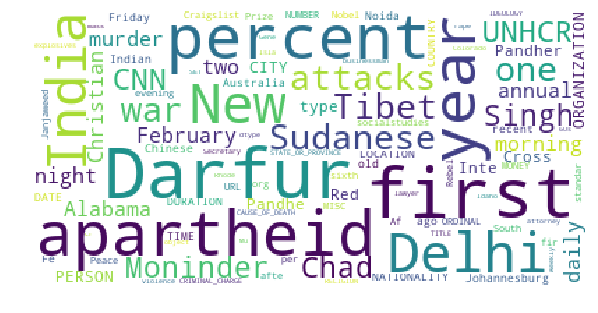

In [301]:
generate_word_cloud(str(all_ner_values), max_words=100)

In [297]:
common_ners = ['PERSON', 'ORGANIZATION', 'COUNTRY']

In [308]:
pd.Series(count_ner_train['context_ner_values']['COUNTRY']).value_counts().head(10)

U.S.             8559
United States    4247
Iraq             2846
Afghanistan      2309
Iran             2153
America          2109
China            1879
Pakistan         1848
England          1479
Mexico           1425
dtype: int64

In [307]:
pd.Series(count_ner_train['query_ner_values']['COUNTRY']).value_counts().head(10)

U.S.           351
US             179
Iraq           139
Iran            98
China           74
Afghanistan     74
Pakistan        71
UK              71
Mexico          58
India           58
dtype: int64

In [111]:
fig = px.bar(count_types_ner_df_train.reset_index().sort_values('type'), x='type', 
             y=["context_ner_count", "query_ner_count", "answer_ner_count"], 
             title="Count of NER in NewsQA train")
fig.show()

#### Longitud textos con tokenización de POS tagging

In [23]:
queries_pd_train = queries_pd.loc[queries_pd['dataset'] == 'train']
queries_pd_devtest = queries_pd.loc[queries_pd['dataset'] != 'train']

In [59]:
queries_pd_train['len_query'] = queries_pd_train['query_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_train['len_context'] = queries_pd_train['context_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_train['len_answer'] = queries_pd_train['answer_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_query'] = queries_pd_devtest['query_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_context'] = queries_pd_devtest['context_pos'].apply(lambda x: len(get_pos(x)))
queries_pd_devtest['len_answer'] = queries_pd_devtest['answer_pos'].apply(lambda x: len(get_pos(x)))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [60]:
queries_pd_train[['len_query', 'len_context']].describe()

len_query    len_context
count  107674.000000  107674.000000
mean        7.620558     556.704794
std         3.286956     155.486379
min         0.000000      49.000000
25%         6.000000     433.000000
50%         7.000000     644.000000
75%         9.000000     684.000000
max       150.000000     738.000000

In [62]:
import numpy as np
np.mean(queries_pd_train.loc[queries_pd_train['impossible']==False, 'len_answer'])

4.223841985666842

In [63]:
queries_pd_devtest[['len_query', 'len_context']].describe()

len_query   len_context
count  11959.000000  11959.000000
mean       7.590852    551.760431
std        2.895300    156.642779
min        1.000000     80.000000
25%        6.000000    422.000000
50%        7.000000    632.000000
75%        9.000000    684.000000
max       50.000000    734.000000

In [65]:
np.mean(queries_pd_devtest.loc[queries_pd_devtest['impossible']==False, 'len_answer'])

4.264933457134014

In [70]:
queries_pd_train['query'] = queries_pd_train['query'].fillna('')
queries_pd_devtest['query'] = queries_pd_devtest['query'].fillna('')

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
queries_pd['query'] = queries_pd['query'].fillna('')
unigram_freq = queries_pd['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()
print(len(list(unigram_freq.index.values)))

4688


In [94]:
print(unigram_freq.head(10))
print(unigram_freq.head(10)/len(queries_pd_train))

what     52649
who      23002
where     8500
how       8187
when      4912
which     2590
the        997
is         991
did        814
in         762
Name: query, dtype: int64
what     0.488967
who      0.213626
where    0.078942
how      0.076035
when     0.045619
which    0.024054
the      0.009259
is       0.009204
did      0.007560
in       0.007077
Name: query, dtype: float64


In [84]:
unigram_list = ['what','who','how','when','in','which', 'where', 'the',  'why'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),2)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

what 0.44 47448
who 0.19 20620
how 0.07 7352
when 0.04 4465
in 0.01 679
which 0.02 2329
where 0.07 7616
the 0.01 878
why 0.0 102

OTHER
16185
0.150314839236956


In [86]:
unigram_freq = queries_pd_devtest['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()
print(len(list(unigram_freq.index.values)))

739


In [88]:
unigram_list = ['what','who','how','when','in','which', 'where', 'the',  'why'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

what 0.4349 5201
who 0.1992 2382
how 0.0698 835
when 0.0374 447
in 0.0069 83
which 0.0218 261
where 0.0739 884
the 0.01 119
why 0.001 12

OTHER
1735
0.14507901998494857


In [96]:
trigrams_pos_freq = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
trigrams_pos_freq.head(10)

WP VBZ DT     5924
WP VVD DT     5806
WP VVD NP     4208
WRB JJ NNS    3759
WP VBD DT     2994
WP VBD VVN    2481
WP VVZ DT     2390
WP VBZ NP     2233
WP VVZ NP     2012
WP NN IN      1858
Name: query_pos, dtype: int64

In [97]:
trigrams_pos_freq = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
trigrams_pos_freq.head(10) 

WP VBZ DT     653
WP VVD DT     627
WP VVD NP     497
WRB JJ NNS    426
WP VBD DT     325
WP VVZ DT     305
WP VBD VVN    290
WP VBZ NP     262
WP VVZ NP     241
WRB VBD DT    226
Name: query_pos, dtype: int64

In [55]:
#queries_pd_devtest['query_trigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_devtest['query'] = queries_pd_devtest['query'].fillna('')
queries_pd_devtest['query_trigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_devtest['query_trigrams_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
queries_pd_devtest['query_cuatrigrams'] = queries_pd_devtest['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
queries_pd_devtest['query_cuatrigrams_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

queries_pd_train['query'] = queries_pd_train['query'].fillna('')
queries_pd_train['query_trigrams'] = queries_pd_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
queries_pd_train['query_trigrams_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
queries_pd_train['query_cuatrigrams'] = queries_pd_train['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
queries_pd_train['query_cuatrigrams_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [50]:
#print(queries_pd_devtest.loc[(queries_pd_devtest['query_trigrams_pos']=='WRB JJ NNS') &
#                (queries_pd_devtest['query_trigrams']!='Wht is the'), 'query_trigrams'].unique().tolist())

In [112]:
unigram_freq = queries_pd_train['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    try:
        unigram_num += unigram_freq[element]
        print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
    except:
        print(element, 0)
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

WP VBZ DT 0.0549 5910
WDT IN DT 0.0 5
WP VBD DT 0.0278 2991
WP NN IN 0.0172 1855
WP VVD DT 0.0538 5789
IN WP NN 0.0074 796
WP VVD NP 0.0389 4186
VVG TO DT 0.0005 53
WRB JJ NNS 0.0349 3758
IN DT NN 0.0006 62
PP MD VV 0.0001 16
WP MD PP 0.0028 303
WP NN VVD 0.0121 1307
WP VBD VVN 0.023 2479
WP VVZ DT 0.0221 2380
WP VBZ NP 0.0206 2223
WRB VVD NP 0.0078 843
WP VVZ NP 0.0185 1991
WRB VBD DT 0.0168 1812
DT NN VVZ 0.0008 87
DT JJ NN 0.0013 136
DT NN VBZ 0.001 108
DT NN IN 0.0012 127

OTHER
68457
0.6357802254954771


In [57]:
unigram_freq = queries_pd_devtest['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    try:
        unigram_num += unigram_freq[element]
        print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
    except:
        print(element, 0)
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

WP VBZ DT 0.0544 650
WDT IN DT 0.0001 1
WP VBD DT 0.0272 325
WP NN IN 0.0161 192
WP VVD DT 0.0523 626
IN WP NN 0.0071 85
WP VVD NP 0.0415 496
VVG TO DT 0.0002 2
WRB JJ NNS 0.0356 426
IN DT NN 0.0008 9
PP MD VV 0.0005 6
WP MD PP 0.003 36
WP NN VVD 0.0103 123
WP VBD VVN 0.0242 290
WP VVZ DT 0.0253 303
WP VBZ NP 0.0218 261
WRB VVD NP 0.0069 82
WP VVZ NP 0.0201 240
WRB VBD DT 0.0189 226
DT NN VVZ 0.0013 15
DT JJ NN 0.0008 10
DT NN VBZ 0.0012 14
DT NN IN 0.0009 11

OTHER
7530
0.629651308637846


In [61]:
queries_pd_train['query_cuatrigrams_pos'].value_counts().head(20)

WP VBZ DT NN      4070
WP VVD DT NN      3275
WP VBD DT NN      1992
WP VVZ DT NN      1451
WP VVD NP NP      1359
WP VBD VVN IN     1253
WRB VBD DT NN     1115
WP VBZ NP NP      1091
WRB JJ NNS VBD    1013
WP VBZ DT JJ       976
WP VVD NP VVP      957
WRB VVD DT NN      949
WP VVD DT NNS      823
WP NN IN NN        778
WP VVD DT JJ       770
WP VVD DT NP       711
WP NN IN NNS       702
WP VVZ NP VV       675
WRB VBZ DT NN      667
WRB JJ NNS VVD     628
Name: query_cuatrigrams_pos, dtype: int64

In [60]:
queries_pd_devtest['query_cuatrigrams_pos'].value_counts().head(20)

WP VBZ DT NN      461
WP VVD DT NN      355
WP VBD DT NN      217
WP VVZ DT NN      169
WP VBD VVN IN     164
WP VVD NP NP      144
WRB VBD DT NN     136
WP VBZ NP NP      131
WRB JJ NNS VBD    123
WP VVD NP VVP     122
WRB VVD DT NN     113
WP VBZ DT JJ      102
WP VVD DT NNS      91
WP VVD DT NP       83
WP NN IN NN        79
WP VVZ NP VV       79
WRB VBZ DT NN      77
WP VVZ NP NP       75
WP NN IN NNS       74
WRB JJ NNS VVD     73
Name: query_cuatrigrams_pos, dtype: int64

In [73]:
queries_pd_train['query_all_pos'] = queries_pd_train['query_pos'].apply(lambda x: ' '.join(get_pos(x)))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
queries_pd_train['query_all_pos'].value_counts()

WP VVD DT NN SENT                      538
WP VBZ NP NP SENT                      492
WP VBD VVN SENT                        445
WP VBZ DT NN IN DT NN SENT             401
WRB JJ NNS VBD VVN SENT                363
                                      ... 
VVP JJ NNS VVP NP MD VV NN SENT          1
WP VBZ VVG DT JJS NNS IN DT NN SENT      1
WRB VBD NP NN IN SENT                    1
WRB JJ NNS VHZ DT NN VHD SENT            1
WP JJ NN VVD DT JJ NN SENT               1
Name: query_all_pos, Length: 62069, dtype: int64

In [65]:
queries_pd_train.loc[queries_pd_train['query_all_pos']=='WP VVD DT NN SENT', 'query'].head()

150    Who abandoned the marriage?
358      Who degraded the country?
430          What caused the fire?
618         Who rescued the diver?
743        Who produced the movie?
Name: query, dtype: object

In [76]:
unigram_freq = queries_pd_train['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

WP VVZ NP VV IN SENT 0.0006 66
WP VBD NP POS NN SENT 0.0005 58
WP VVD DT NN SENT 0.005 538
WP VBZ NP NP SENT 0.0046 492
WP VBZ DT JJS NN IN DT NN SENT 0.0001 6

OTHER
106514
0.989226739974367


In [64]:
queries_pd_devtest['query_all_pos'] = queries_pd_devtest['query_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_devtest['query_all_pos'].value_counts()

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



WP VVD DT NN SENT                                                                                         64
WP VBZ NP NP SENT                                                                                         58
WP VBZ DT NN IN DT NN SENT                                                                                51
WP VBD VVN SENT                                                                                           44
WP VVD NP VVP SENT                                                                                        42
                                                                                                          ..
NP VVZ NP `` IN RB JJ NNS VVD JJ NN JJ `` NP NP  NP NN DT NN IN NP POS NN NN IN NP RB VVZ DT NN VVG NN     1
IN WP NN VVD NP VV DT NN SENT                                                                              1
VBD NN VVN TO DT NN SENT                                                                                   1
WP NN IN JJ NNS SEN

In [66]:
queries_pd_devtest.loc[queries_pd_devtest['query_all_pos']=='WP VVD DT NN SENT', 'query'].head()

1552     Who made the documentary?
2165            Who owned the bus?
3549       Who produced the album?
7009        What killed the woman?
10042        Who signed the order?
Name: query, dtype: object

In [75]:
unigram_freq = queries_pd_devtest['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

WP VVZ NP VV IN SENT 0.0009 11
WP VBD NP POS NN SENT 0.0012 14
WP VVD DT NN SENT 0.0054 64
WP VBZ NP NP SENT 0.0048 58
WP VBZ DT JJS NN IN DT NN SENT 0.0001 1

OTHER
11811
0.9876243833096413


In [322]:
queries_pd_train['answer_red_pos'] = queries_pd_train['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_train['answer_pral_pos'] = queries_pd_train['answer_red_pos'].apply(lambda x: pral_pos(x))
queries_pd_train['answer_pral_pos'].value_counts()

queries_pd_devtest['answer_red_pos'] = queries_pd_devtest['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
queries_pd_devtest['answer_pral_pos'] = queries_pd_devtest['answer_red_pos'].apply(lambda x: pral_pos(x))
queries_pd_devtest['answer_pral_pos'].value_counts()

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

NP    4568
      2962
JJ    1801
NN    1104
CD     734
V      699
R       91
Name: answer_pral_pos, dtype: int64

In [324]:
unigram_freq = queries_pd_train['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

NP 0.3741 40276
NN 0.0918 9880
JJ 0.152 16364
CD 0.0629 6775
V 0.0606 6527
R 0.008 864

OTHER
26988
0.25064546687222544


In [325]:
unigram_freq = queries_pd_devtest['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

NP 0.382 4568
NN 0.0923 1104
JJ 0.1506 1801
CD 0.0614 734
V 0.0584 699
R 0.0076 91

OTHER
2962
0.24767957187055775


### Obtener foco de la pregunta

In [24]:
queries_pd_train['foco'] = queries_pd_train.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)
queries_pd_train['foco'].value_counts().head(30)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



person        20906
place          7725
time           4673
people         1481
name           1217
                963
number          869
country         768
age             600
kind            574
Obama           544
did             457
reason          432
year            432
police          425
type            406
quantity        394
his             380
U.S.            316
city            313
group           279
state           276
years           269
Whose           267
company         254
team            243
man             233
children        224
government      219
president       218
Name: foco, dtype: int64

In [26]:
unigram_freq = queries_pd_train['foco'].value_counts()
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

person 0.1942 20906
number 0.0081 869
time 0.0434 4673
place 0.0717 7725
year 0.004 432
name 0.0113 1217
type 0.0038 406
people 0.0138 1481
country 0.0071 768
percentage 0.0018 196
kind 0.0053 574
age 0.0056 600

OTHER
67827
0.6299292308263833


In [27]:
queries_pd_devtest['foco'] = queries_pd_devtest.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)
queries_pd_devtest['foco'].value_counts().head(30)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



person        2406
place          892
time           472
people         172
name           145
country         98
                87
number          85
age             61
kind            58
police          53
Obama           53
reason          53
did             50
his             48
quantity        47
type            41
year            41
Whose           41
U.S.            40
president       33
group           33
day             30
city            30
percentage      30
countries       29
her             28
team            27
years           27
man             26
Name: foco, dtype: int64

In [29]:
unigram_freq = queries_pd_devtest['foco'].value_counts()
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

person 0.2012 2406
number 0.0071 85
time 0.0395 472
place 0.0746 892
year 0.0034 41
name 0.0121 145
type 0.0034 41
people 0.0144 172
country 0.0082 98
percentage 0.0025 30
kind 0.0048 58
age 0.0051 61

OTHER
7458
0.6236307383560499


In [310]:
queries_pd_train.head()

id  \
0  0-42d01e187213e86f5fe617fe32e716ff7fa3afc4.story   
1  1-c48228a52f26aca65c31fad273e66164f047f292.story   
2  2-c65ed85800e4535f4bbbfa2c34d7d9630358d303.story   
3  3-0cf66b646e9b32076513c050edf32a799200c3c2.story   
4  4-13012604e3203c18df09289dfedd14cde67cf40b.story   

                                               query  \
0          What was the amount of children murdered?   
1                     Where was one employee killed?   
2  who did say South Africa did not issue a visa ...   
3            How many years old was the businessman?   
4                      What frightened the families?   

                                              answer  impossible  \
0                                                 19       False   
1                          Sudanese region of Darfur       False   
2                            Archbishop Desmond Tutu       False   
3                                        29-year-old       False   
4  a series of killings and threats by Muslim ext...       False   

                                           plausible dataset  \
0                                                NaN   train   
1                                            Seleia,   train   
2                                      his spokesman   train   
3                                                NaN   train   
4  series of killings and threats by Muslim extre...   train   

                                             context  \
0  NEW DELHI, India (CNN) -- A high court in nort...   
1  (CNN) -- Fighting in the volatile Sudanese reg...   
2  Johannesburg (CNN) -- Miffed by a visa delay t...   
3  (CNN)  -- England international footballer Ste...   
4  BAGHDAD, Iraq (CNN)  -- At least 6,000 Christi...   

                                           query_ner  \
0                                                 {}   
1                                {'NUMBER': ['one']}   
2                      {'COUNTRY': ['South Africa']}   
3  {'DURATION': ['years'], 'TITLE': ['businessman']}   
4                                                 {}   

                                         context_ner  \
0  {'CITY': ['NEW DELHI', 'New Delhi'], 'COUNTRY'...   
1  {'ORGANIZATION': ['CNN', 'Red Cross', 'U.N.', ...   
2  {'CITY': ['Johannesburg', 'New Delhi', 'Beijin...   
3  {'ORGANIZATION': ['CNN', 'Liverpool Crown Cour...   
4  {'CITY': ['BAGHDAD', 'Baghdad'], 'COUNTRY': ['...   

                                          answer_ner  ...  \
0                                 {'NUMBER': ['19']}  ...   
1  {'NATIONALITY': ['Sudanese'], 'LOCATION': ['Da...  ...   
2  {'TITLE': ['Archbishop'], 'PERSON': ['Desmond ...  ...   
3                      {'DURATION': ['29 year old']}  ...   
4                  {'RELIGION': ['Muslim', 'Islam']}  ...   

  phiyodr/roberta-large-finetuned-squad2 valhalla/t5-base-squad  \
0                                    NaN                    NaN   
1                                    NaN                    NaN   
2                                    NaN                    NaN   
3                                    NaN                    NaN   
4                                    NaN                    NaN   

  tli8hf/unqover-roberta-large-newsqa len_query len_context len_answer  \
0                                 NaN         8         259          1   
1                                 NaN         6         476          4   
2                                 NaN        13         691          3   
3                                 NaN         8         469          1   
4                                 NaN         5         425         19   

        query_trigrams query_trigrams_pos              query_cuatrigrams  \
0         What was the          WP VBD DT            What was the amount   
1        Where was one         WRB VBD CD         Where was one employee   
2          who did say         WP VVD VVP              who did say South   
3       How many years         WRB JJ NNS             How

In [326]:
queries_pd_train.columns

Index(['id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'query_ner', 'context_ner', 'answer_ner', 'plausible_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos', 'foco',
       'tli8hf/unqover-bert-base-uncased-newsqa',
       'tli8hf/unqover-bert-large-uncased-newsqa',
       'tli8hf/unqover-roberta-base-newsqa',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'tli8hf/unqover-roberta-large-newsqa', 'len_query', 'len_context',
       'len_answer', 'query_trigrams', 'query_trigrams_pos',
       'query_cuatrigrams', 'query_cuatrigrams_pos', 'answer_red_pos',
       'answer_pral_pos'],
      dtype='object')

In [136]:
queries_pd_train.to_excel('datasets/newsqa/models/NER-POS-F-NEWSQA-train-queries.xlsx', index=False)

In [137]:
queries_pd_devtest.to_excel('datasets/newsqa/models/NER-POS-F-NEWSQA-dev-test-queries.xlsx', index=False)

In [311]:
queries_pd_devtest.head()

id  \
8     8-d191e20468fc7675fcfa55c33fab1e65405740a0.story   
56   56-289a45e715707cf650352f3eaa123f85d3653d4b.story   
76   76-6e8382e61be49c936e00a8eea24377a687622967.story   
113  113-bce33bb5b5cff6b93065aa0cf91917c8dd36ac78.s...   
119  119-017df5c4fe1e79eb26957ff6a8b4c1e41cd966ac.s...   

                                                 query  \
8                                 Iran criticizes who?   
56                      What is going live on Tuesday?   
76            What should you do with your own videos?   
113  What was the space station crew forced to take...   
119  for what People just don't trust their instincts?   

                                                answer  impossible  \
8                    U.S. President-elect Barack Obama        True   
56    Web-based on-demand television and movie service       False   
76                                                 NaN        True   
113                                  a piece of debris       False   
119  and they're not willing to take a risk. Have f...        True   

              plausible dataset  \
8                   NaN     dev   
56   Fancast XFINITY TV    test   
76                  NaN     dev   
113                 NaN    test   
119                 NaN    test   

                                               context              query_ner  \
8    TEHRAN, Iran (CNN) -- Iran's parliament speake...  {'COUNTRY': ['Iran']}   
56   (CNN) -- Comcast rolled out a Web-based on-dem...  {'DATE': ['Tuesday']}   
76   (CNN) -- What could be more powerful than the ...                     {}   
113  (CNN) -- NASA won't have to maneuver the inter...                     {}   
119  (CNN) -- Decorating in the midst of a financia...                     {}   

                                           context_ner  \
8    {'LOCATION': ['TEHRAN', 'Persian Gulf', 'Repub...   
56   {'ORGANIZATION': ['CNN Comcast', 'Comcast', 'C...   
76   {'MISC': ['Native', 'Keep', 'Beautiful', 'Nati...   
113  {'ORGANIZATION': ['CNN NASA', 'NASA', 'Johnson...   
119  {'ORGANIZATION': ['CNN', 'Dress My Nest', 'CNN...   

                                            answer_ner  ...  \
8    {'COUNTRY': ['U.S.'], 'TITLE': ['President'], ...  ...   
56                                                  {}  ...   
76                                                  {}  ...   
113                                                 {}  ...   
119                                                 {}  ...   

                phiyodr/roberta-large-finetuned-squad2  \
8                                                  NaN   
56   {'score': 0.9454475045204163, 'start': 3360, '...   
76                                                 NaN   
113  {'score': 0.7144440412521362, 'start': 2783, '...   
119  {'score': 0.5803229808807373, 'start': 4542, '...   

          valhalla/t5-base-squad  \
8                            NaN   
56            Fancast XFINITY TV   
76                           NaN   
113                       debris   
119  home decorating on a budget   

                   tli8hf/unqover-roberta-large-newsqa len_query len_context  \
8                                                  NaN         4         524   
56   {'score': 0.4652361571788788, 'start': 3350, '...         7         639   
76                                                 NaN         8         304   
113  {'score': 0.0878596231341362, 'start': 2783, '...        12         483   
119  {'score': 0.21265746653079987, 'start': 4554, ...         9         702   

    len_answer        query_trigrams query_trigrams_pos     query_cuatrigrams  \
8            4  Iran criticizes who?          NP VVZ WP  Iran criticizes who?   
56           6         What is going         WP VBZ VVG    What is going live   
76           0       What should you           WP MD PP    What should you do   
113          4          What was the          WP VBD DT    What was the space   
119         20       for what People          IN WP NNS

##### Validacion tipo foco y entidad respuesta

In [32]:
queries_pd_train['answer_ner_tags'] = queries_pd_train['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))
queries_pd_devtest['answer_ner_tags'] = queries_pd_devtest['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))

Invalid \escape: line 1 column 24 (char 23)
{"PERSON": ["Alan GarcÃ\xada", "Bachelet", "Edwin Donayre"], "DATE": ["last week"], "TITLE": ["Gen."]}


c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
print(sum(queries_pd_train.loc[queries_pd_train['foco'] == 'person', 'answer_ner_tags'].value_counts()))
queries_pd_train.loc[queries_pd_train['foco'] == 'person', 'answer_ner_tags'].value_counts()

20906


['PERSON']                                                                                                         8868
[]                                                                                                                 5232
['ORGANIZATION']                                                                                                   1242
['TITLE', 'PERSON']                                                                                                 901
['COUNTRY']                                                                                                         660
                                                                                                                   ... 
['LOCATION', 'NUMBER']                                                                                                1
['CAUSE_OF_DEATH', 'PERSON']                                                                                          1
['ORGANIZATION', 'IDEOLOGY', 'COUNTRY', 

In [33]:
queries_pd_train['answer'] = queries_pd_train['answer'].fillna('')
queries_pd_train['validation_foco_ner'] = queries_pd_train[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
queries_pd_train['answer'] = queries_pd_train['answer'].fillna('')
queries_pd_train['validation_foco_ner'] = queries_pd_train[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
queries_pd_train.loc[queries_pd_train['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
queries_pd_train.loc[queries_pd_train['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
queries_pd_train['validation_foco_ner'].value_counts()

NA                 48903
KO                 27136
OK-PERSON          10830
OK-NUMBER           5624
OK-PERSON-ORG       5011
OK-LOC              4827
OK-TIME             4305
OK-COUNTRY           543
OK-CITY              148
OK-MONEY             103
OK-DATE               93
OK-NATIONALITY        72
OK-ORGANIZATION       37
OK-RELIGION           13
OK-PERCENT             9
OK-TITLE               8
OK-LOCATION            7
OK-DURATION            4
OK-IDEOLOGY            1
Name: validation_foco_ner, dtype: int64

In [41]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                'OK-TITLE', 'OK-NATIONALITY', 'OK-RELIGION', 'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY','OK-LOCATION', 'OK-CITY',
                'OK-DATE', 'OK-TIME', 'OK-DURATION',
                'OK-NUMBER','OK-PERCENT', 'OK-MONEY', 
                #'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = queries_pd_train['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_train),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_train) - unigram_num)
print((len(queries_pd_train) - unigram_num)/len(queries_pd_train))

OK-PERSON 0.1006 10830
OK-ORGANIZATION 0.0003 37
OK-PERSON-ORG 0.0465 5011
OK-TITLE 0.0001 8
OK-NATIONALITY 0.0007 72
OK-RELIGION 0.0001 13
OK-IDEOLOGY 0.0 1
OK-LOC 0.0448 4827
OK-COUNTRY 0.005 543
OK-LOCATION 0.0001 7
OK-CITY 0.0014 148
OK-DATE 0.0009 93
OK-TIME 0.04 4305
OK-DURATION 0.0 4
OK-NUMBER 0.0522 5624
OK-PERCENT 0.0001 9
OK-MONEY 0.001 103
KO 0.252 27136
NA 0.4542 48903

OTHER
0
0.0


In [34]:
queries_pd_devtest['answer'] = queries_pd_devtest['answer'].fillna('')
queries_pd_devtest['validation_foco_ner'] = queries_pd_devtest[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
queries_pd_devtest.loc[queries_pd_devtest['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
queries_pd_devtest.loc[queries_pd_devtest['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

In [49]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                #'OK-TITLE', 
                'OK-NATIONALITY', 'OK-RELIGION', #'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY',#'OK-LOCATION',
                'OK-CITY',
                'OK-DATE', 'OK-TIME', #'OK-DURATION',
                'OK-NUMBER','OK-PERCENT', 'OK-MONEY', 
                #'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = queries_pd_devtest['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(queries_pd_devtest),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(queries_pd_devtest) - unigram_num)
print((len(queries_pd_devtest) - unigram_num)/len(queries_pd_devtest))

OK-PERSON 0.1065 1274
OK-ORGANIZATION 0.0004 5
OK-PERSON-ORG 0.0456 545
OK-NATIONALITY 0.0007 8
OK-RELIGION 0.0003 3
OK-LOC 0.0439 525
OK-COUNTRY 0.0059 70
OK-CITY 0.0015 18
OK-DATE 0.0008 9
OK-TIME 0.0356 426
OK-NUMBER 0.0549 656
OK-PERCENT 0.0001 1
OK-MONEY 0.0008 10
KO 0.2544 3042
NA 0.4488 5367

OTHER
0
0.0


In [122]:
queries_pd_devtest['answer_ner_tags_processed'] = queries_pd_devtest['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))
queries_pd_train['answer_ner_tags_processed'] = queries_pd_train['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
def marca_multiple_ninguna_ner(tipo_ner, number_ner, impossible):
    if impossible:
        return 'NO RESP'
    if number_ner == 0:
        return 'SIN NER'
    if number_ner == 1:
        return str(tipo_ner).replace('[','').replace(']','').replace("'",'')
    else:
        return 'MULTI'

In [124]:
queries_pd_devtest['answer_ner_tags_processed'] = queries_pd_devtest[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)
queries_pd_train['answer_ner_tags_processed'] = queries_pd_train[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
print(queries_pd_train['answer_ner_tags_processed'].value_counts())
print(100*queries_pd_train['answer_ner_tags_processed'].value_counts() / len(queries_pd_train))

NO RESP              50464
SIN NER              18681
PERSON                9181
MULTI                 7363
NUMBER                6299
DATE                  2901
COUNTRY               2278
ORGANIZATION          2005
DURATION              1110
MONEY                  936
CAUSE_OF_DEATH         910
CITY                   895
NATIONALITY            829
TITLE                  792
STATE_OR_PROVINCE      644
LOCATION               619
CRIMINAL_CHARGE        497
MISC                   333
ORDINAL                262
PERCENT                208
IDEOLOGY               189
RELIGION               106
TIME                    68
URL                     53
SET                     48
HANDLE                   3
Name: answer_ner_tags_processed, dtype: int64
NO RESP              46.867396
SIN NER              17.349592
PERSON                8.526664
MULTI                 6.838234
NUMBER                5.850066
DATE                  2.694244
COUNTRY               2.115645
ORGANIZATION          1.862102
DURA

In [126]:
print(queries_pd_devtest['answer_ner_tags_processed'].value_counts())
print(100*queries_pd_devtest['answer_ner_tags_processed'].value_counts() / len(queries_pd_devtest))

NO RESP              5497
SIN NER              2071
PERSON               1050
MULTI                 847
NUMBER                716
DATE                  293
COUNTRY               279
ORGANIZATION          204
MONEY                 118
NATIONALITY           111
CITY                  107
CAUSE_OF_DEATH        100
TITLE                  98
DURATION               95
LOCATION               73
STATE_OR_PROVINCE      73
CRIMINAL_CHARGE        60
MISC                   42
PERCENT                35
ORDINAL                23
IDEOLOGY               20
RELIGION               20
TIME                   14
SET                     8
URL                     5
Name: answer_ner_tags_processed, dtype: int64
NO RESP              45.965382
SIN NER              17.317501
PERSON                8.779998
MULTI                 7.082532
NUMBER                5.987123
DATE                  2.450038
COUNTRY               2.332971
ORGANIZATION          1.705828
MONEY                 0.986705
NATIONALITY           0.9

In [127]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

def entidades_posibles_contexto(tipo_ner, context_ner):
    return get_ner_count(load_data(context_ner), tipo_ner)

In [128]:
queries_pd_train['context_ner_tags_answer'] = queries_pd_train[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)
queries_pd_devtest['context_ner_tags_answer'] = queries_pd_devtest[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 540 (char 539)
{"URL": ["EW.com", "EW.com"], "DATE": ["2012", "start this weekend", "January", "2012", "this week", "weekend", "fourth weekend", "now", "weekend", "now", "now", "now", "this weekend", "this weekend", "this weekend", "weekend", "New Year 's Eve", "weekend", "Valentine 's Day", "New Year 's Eve", "2011", "weekend"], "ORGANIZATION": ["Paramount", "CinemaScore", "Paramount", "Focus Features ' Tinker Tailor Soldier Spy", "Time Inc", "Sherlock Holmes"], "MONEY": ["$ 1 million", "$ 34.5 million", "$ 40.1 million", "$ 35.9 million", "2005â \x80", "$ 75.1 million", "2009â \x80", "$ 55.4 million 2010â \x80", "$ 41 million", "2011â \x80", "$ 54 million", "$ 1.5 million", "$ 8 million", "$ 296.7 million", "$ 70 million", "$ 20.5 million", "$ 170.2 million", "$ 200 million", "$ 14.1 million", "$ 59.7 million", "$ 22.7 million", "$ 157.4 million", "$ 11.3 million", "$ 76.8 million", "$ 100 million", "$ 9.5 million", "$ 111.6 million", "$ 8.6", "$ 8.5 mi

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 418 (char 417)
{"ORGANIZATION": ["CNN", "Real Sociedad", "Real Madrid", "Real Sociedad", "Levante", "Real Madrid", "UEFA Champions League", "Real Madrid", "Barcelona", "Udinese", "Napoli", "Udinese", "AC Milan", "Parma", "Lecce", "Parma", "Milan", "Parma", "AFP", "Levante", "Real Sociedad", "Valencia", "Udinese", "AC Milan"], "NATIONALITY": ["Spanish", "Spanish", "Argentine"], "PERSON": ["Levante", "Ruben Suarez", "Inigo MartÃ Â\xadnez", "Sociedad", "Daniel Estrada", "Nano Rivas", "Valdo Lopes", "Levante", "Suarez", "Levante", "Villarreal", "Villarreal", "Karim Benzema", "Kaka", "Angel Di Maria", "Ezequiel Lavezzi", "Christian Maggio", "Kevin Prince Boetang", "Antonio Nocerino", "Zlatan Ibrahimovic", "Nocerino", "Massimiliano Allegri", "Ruben Suarez"], "NUMBER": ["3 2", "three", "2 0", "Two", "four", "4 1", "3 0", "4 3", "three", "3 2", "four"], "ORDINAL": ["seventh", "second", "10th", "first", "third", "second", "first", "first", "10th"], "STATE_OR_PROVI

Invalid \escape: line 1 column 418 (char 417)
{"ORGANIZATION": ["CNN", "Real Sociedad", "Real Madrid", "Real Sociedad", "Levante", "Real Madrid", "UEFA Champions League", "Real Madrid", "Barcelona", "Udinese", "Napoli", "Udinese", "AC Milan", "Parma", "Lecce", "Parma", "Milan", "Parma", "AFP", "Levante", "Real Sociedad", "Valencia", "Udinese", "AC Milan"], "NATIONALITY": ["Spanish", "Spanish", "Argentine"], "PERSON": ["Levante", "Ruben Suarez", "Inigo MartÃ Â\xadnez", "Sociedad", "Daniel Estrada", "Nano Rivas", "Valdo Lopes", "Levante", "Suarez", "Levante", "Villarreal", "Villarreal", "Karim Benzema", "Kaka", "Angel Di Maria", "Ezequiel Lavezzi", "Christian Maggio", "Kevin Prince Boetang", "Antonio Nocerino", "Zlatan Ibrahimovic", "Nocerino", "Massimiliano Allegri", "Ruben Suarez"], "NUMBER": ["3 2", "three", "2 0", "Two", "four", "4 1", "3 0", "4 3", "three", "3 2", "four"], "ORDINAL": ["seventh", "second", "10th", "first", "third", "second", "first", "first", "10th"], "STATE_OR_PROVI

Invalid \escape: line 1 column 2879 (char 2878)
{"ORGANIZATION": ["Budget Travel", "Pedro & Lola", "Pacifico", "Best Western Posada Freeman Express", "Aqua Sport Center", "Ixtapa Beach Hotel", "BudgetTravel.com Ixtapa Zihuatanejo", "ACAPULCO Acapulco", "Ninas", "BudgetTravel.com Acapulco", "Buenaventura Grand Hotel & Spa", "Playa Camarones", "El Encanto Inn & Suites", "Todos Santos", "El Tecolote Libros", "Todos Santos", "BudgetTravel.com Los Cabos", "Xcaret", "BudgetTravel.com Cancun", "Cozumel", "La Candela", "Newsweek Budget Travel Inc.", "Cozumel"], "TITLE": ["guide", "artist", "river", "operator"], "NUMBER": ["seven", "one", "one", "one", "011 52/669 982", "72", "6060", "one", "3333", "three", "30", "011 52/755 554", "011 52/755 553 3700", "3584", "One", "130", "One", "126", "800/343 7821", "3735", "Eight", "one", "one", "One", "200", "7000", "011 52/322 222 4034", "one", "20", "3662", "28", "011 52/624 142", "6926", "11", "one", "6014", "11", "seven", "011 52/987 872 5476", "011 

Invalid \escape: line 1 column 391 (char 390)
{"CITY": ["LONDON", "Caracas"], "COUNTRY": ["England", "Britain", "Venezuela", "Britain", "Venezuela", "UK", "Venezuela", "Italy", "UK", "Venezuela", "Britain", "Britain", "England", "UK", "Venezuela", "UK"], "LOCATION": ["CNN", "Carnegie Hall", "Eastern Europe", "El Sistema", "Broadway", "El Sistema"], "ORGANIZATION": ["Simon Bolivar Youth Symphony Orchestra", "CNN", "El Sistema", "BolÃ\xadvar Youth Orchestra", "Los Angeles Philharmonic", "New York Times"], "STATE_OR_PROVINCE": ["New York"], "DATE": ["November last year", "over 30 years ago", "currently", "next year", "today", "the 1970s"], "TITLE": ["cellist", "director", "cellist", "composer", "cellist"], "PERSON": ["Julian Lloyd Webber", "Lloyd Webber", "Gustavo Dudamel", "Lloyd Webber", "Yehudi Menuhin", "Elton John", "Lloyd Webber", "Lloyd Webber", "Lloyd Webber", "William Lloyd Webber", "Andrew Lloyd Webber", "Julian Lloyd Webber"], "NUMBER": ["three", "One", "10", "100", "250 000", 

Invalid \escape: line 1 column 749 (char 748)
{"ORGANIZATION": ["CNN Playboy", "Playboy Mexico", "CNN", "CNN", "Radio La Paz", "Playboy", "Playboy", "Playboy"], "DATE": ["Monday", "last week", "now", "the month of December", "the year", "the day", "Now", "Now", "December"], "NATIONALITY": ["Mexican", "Argentine", "Mexican", "Mexican", "Spanish", "Cuban", "Spanish", "English"], "TITLE": ["model", "host", "model", "publisher", "model", "Model", "host", "Priest"], "PERSON": ["Virgin Mary", "Virgin Mary", "Virgin Mary", "Rick Sanchez", "Glenda Umana", "Albert Cutie", "Rick Sanchez", "Glenda Umana", "Florencia Onori", "Virgin Mary", "Rick", "Sanchez", "Sanchez", "Raul Sayrols", "Cutie", "Albert Cutie Listen", "Mary", "Glenda", "Mary", "Sanchez", "Sanchez Father", "Mary", "Te Adoramos MarÃ\xada", "Mary", "Sanchez", "Te Adoramos", "Sanchez Hail", "Mary", "Jesus", "Florencia Onori", "Mary", "Virgin Mary"], "DURATION": ["days"], "MISC": ["Immaculate Conception", "Mexicans", "Catholics", "Cathol

Invalid \escape: line 1 column 990 (char 989)
{"ORGANIZATION": ["CNN", "People 's Court", "People 's Court", "Facebook", "Facebook", "Facebook", "HLN", "People 's Court", "HLN", "People 's Court"], "CITY": ["Orlando", "Orlando"], "TITLE": ["police chief", "Police Chief", "Judge", "police chief"], "DATE": ["Monday", "November 17", "months earlier", "Monday", "Monday", "recently", "about five years ago", "Monday", "November 17 the day"], "STATE_OR_PROVINCE": ["Florida"], "NUMBER": ["two", "two", "5", "5", "one", "two"], "PERSON": ["Paul Rooney", "Dale Smith Jr.", "Michelle Parker", "Smith", "Rooney", "Michelle", "Rooney", "Smith", "Smith", "Rooney", "Parker", "Yvonne Stewart", "Smith", "Stewart", "Michelle", "Rooney", "Smith", "Parker", "Lauren Erickson", "Nancy Grace", "Smith", "Marilyn Milian", "Erickson", "Parker", "Erickson", "Dustin Erickson", "Vinnie Politan", "Smith", "Parker", "Dustin Erickson", "Dale Smith Jr.", "Michelle Parker", "Smith", "Smith"], "DURATION": ["day", "day", "a

Invalid \escape: line 1 column 2005 (char 2004)
{"CITY": ["Rome"], "PERSON": ["Mario Monti", "Monti", "Monti", "Monti", "Silvio Berlusconi", "Berlusconi", "Monti", "Monti", "Antonio Di Pietro", "Berlusconi", "Monti", "Monti", "Monti", "Monti", "Franceso Rutelli", "Monti", "Emma Bonino", "Monti", "Bonino", "Monti", "Silvio Berlusconi", "Berlusconi", "Monti", "Deborah Bergamini", "Berlusconi", "Bergamini", "Berlusconi", "Berlusconi", "Monti", "Berlusconi", "Monti", "Bergamini", "Berlusconi", "Monti", "Mario", "Monti", "Giorgio Napolitano", "Napolitano", "Monti", "Napolitano", "Monti", "Monti", "Berlusconi", "George Papandreou", "Lucas Papademos", "Monti", "Bergamini", "Hada Messia Matthew Chance Laura Smith Spark", "Zain Verjee", "Monti", "Mario Monti", "Monti", "Silvio Berlusconi"], "TITLE": ["economist", "prime minister", "prime minister", "prime minister", "leader", "leader", "prime minister", "assistant", "prime minister", "President", "prime minister", "prime minister", "president",

Invalid \escape: line 1 column 2251 (char 2250)
{"ORGANIZATION": ["Budget Travel Here", "Europcar", "Budget Travel Trip Coach Friends", "Disney", "Porto", "Lux Fragil", "Newsweek Budget Travel Inc."], "COUNTRY": ["Portugal", "Portugal", "Portugal", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Spain", "Portugal", "Portugal", "Portugal", "Portugal", "Portugal"], "DATE": ["300 days of the year", "medieval", "medieval", "More than 500 years ago", "18th century", "spring to autumn", "summer", "16th century", "the 18th century", "medieval", "time", "1742", "the late 18th century", "1910", "medieval", "Friday", "Saturday", "the whole day", "the summer June through August", "The spring April", "May", "autumn September", "October", "The winter November", "March", "2009", "medieval"], "LOCATION": ["Dianamar", "Europe", "Guincho", "Atlantic", "Tagus", "Atlantic", "Bairro Alto", "Alentejo", "Pinhel", "da", "Douro", "Europe", "Douro", "Iberian Peninsula", "Gaia", "Douro", "Europe", "Zo

Invalid \escape: line 1 column 1065 (char 1064)
{"ORGANIZATION": ["CNN", "LOT Polish Airlines", "Boeing", "Boeing", "CNN", "Facebook", "Dobry TVN", "LOT Polish Airlines", "Boeing"], "TITLE": ["Capt.", "pilot", "Capt.", "River", "pilot", "captain", "pilot", "Pilot"], "PERSON": ["Tadeusz Wrona", "Wrona", "Wrona", "Wrona", "Chesley", "Sullenberger", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Sullenberger", "Sullenberger", "Wrona", "Sullenberger Wrona", "Wrona", "Wrona", "Wrona", "Marzena Wrona", "Wrona", "Tadeusz Wrona", "@highlight Wrona"], "TIME": ["night", "4 a.m"], "COUNTRY": ["Poland", "Vietnam", "Poland"], "NATIONALITY": ["Polish", "Polish", "Polish"], "CAUSE_OF_DEATH": ["disaster"], "DATE": ["Now", "Tuesday", "Wednesday", "2009", "now", "Saturday", "Thursday"], "DURATION": ["20 years", "about two minutes", "20 years"], "NUMBER": ["767", "220", "11", "500", "three", "two", "One", "33 000", "two", "767", "500"], "CITY": ["Newark", "Warsaw", "Warsaw", "Hudson", "Hudson", "

Invalid \escape: line 1 column 749 (char 748)
{"ORGANIZATION": ["CNN Playboy", "Playboy Mexico", "CNN", "CNN", "Radio La Paz", "Playboy", "Playboy", "Playboy"], "DATE": ["Monday", "last week", "now", "the month of December", "the year", "the day", "Now", "Now", "December"], "NATIONALITY": ["Mexican", "Argentine", "Mexican", "Mexican", "Spanish", "Cuban", "Spanish", "English"], "TITLE": ["model", "host", "model", "publisher", "model", "Model", "host", "Priest"], "PERSON": ["Virgin Mary", "Virgin Mary", "Virgin Mary", "Rick Sanchez", "Glenda Umana", "Albert Cutie", "Rick Sanchez", "Glenda Umana", "Florencia Onori", "Virgin Mary", "Rick", "Sanchez", "Sanchez", "Raul Sayrols", "Cutie", "Albert Cutie Listen", "Mary", "Glenda", "Mary", "Sanchez", "Sanchez Father", "Mary", "Te Adoramos MarÃ\xada", "Mary", "Sanchez", "Te Adoramos", "Sanchez Hail", "Mary", "Jesus", "Florencia Onori", "Mary", "Virgin Mary"], "DURATION": ["days"], "MISC": ["Immaculate Conception", "Mexicans", "Catholics", "Cathol

Invalid \escape: line 1 column 1154 (char 1153)
{"COUNTRY": ["MEXICO", "Mexico", "Mexico", "Mexico", "Mexico", "U.S.", "Mexico", "Mexico"], "LOCATION": ["CITY", "City", "Ciudad", "El Tiempo", "Ciudad"], "DATE": ["recently", "Tuesday", "less than 24 hours earlier", "Tuesday", "January", "three weeks ago", "Monday", "2006", "2008", "2007", "Tuesday", "Wednesday", "last weekend", "this year", "Last year", "weeks ago"], "NATIONALITY": ["Mexican"], "TITLE": ["general", "soldier", "general", "Gen.", "driver", "prosecutor", "general", "consultant", "mayor", "assistant prosecutor", "prosecutor", "prosecutor", "Lt.", "bodyguard", "Mayor", "driver", "Lt. Col.", "Attorney General", "House Speaker", "general", "prosecutor", "Gen.", "general"], "CITY": ["Cancun", "Cancun", "Cancun", "Cancun", "Merida", "Cancun", "Cancun", "Chihuahua", "Chihuahua", "Juarez", "Chihuahua", "Chihuahua", "Juarez", "Cancun"], "PERSON": ["Mauro Enrique Tello", "Quintana Roo", "Bello Melchor Rodriguez", "Carrillo", "Tello"

Invalid \escape: line 1 column 123 (char 122)
{"TITLE": ["Editor", "writer", "writer", "writer", "writer", "writer", "writer", "writer", "writer"], "PERSON": ["Junot DÃ\xadaz", "Oscar Wao", "Ralph Ellison", "Junot Diaz", "Junot Diaz"], "MISC": ["Pulitzer Prize", "No Writing", "Zone", "Great", "Novel", "Pulitzer Prize"], "DATE": ["2008", "past", "past", "fifth year", "the future", "time", "now", "last second", "Sunday", "September", "September", "August", "November", "now", "2010"], "URL": ["OPRAH.com", "Oprah.com", "Oprah.com", "Oprah.com"], "SET": ["every day", "Every day"], "TIME": ["7 a.m.", "Twilight", "night in", "night", "night"], "NUMBER": ["eight", "6", "75", "75", "75", "one", "75", "five", "Five", "one", "three", "One", "one", "one", "75", "two", "4", "one", "11", "75", "18", "75"], "CRIMINAL_CHARGE": ["train"], "LOCATION": ["Shea Stadium"], "ORDINAL": ["first", "first", "first", "first", "second"], "DURATION": ["years", "years", "five years", "five years", "Five years 60 mon

Invalid \escape: line 1 column 445 (char 444)
{"ORGANIZATION": ["CNN", "Hannover", "Der Tagesspiegel", "Barca"], "NUMBER": ["96", "one", "one", "18.17", "¼", "one", "32"], "COUNTRY": ["Germany", "South Africa", "Germany", "Germany"], "TITLE": ["goalkeeper", "manager", "Goalkeeper", "Chairman", "goalkeeper"], "PERSON": ["Robert Enke", "Robert Enke", "Joachim", "Lara", "Robert Enke", "Enke", "Der Bild", "Enke", "Robert Enke", "Enke", "Zeitung", "Enke", "Robert Enke", "Enke", "Enke", "LuÃ\xads Filipe Vieira", "Robert Enke", "Enke", "Nuno Gomes", "Robert Enke", "Enke"], "CAUSE_OF_DEATH": ["suicide", "suicide", "suicide", "suicide"], "NATIONALITY": ["German", "German"], "DATE": ["2010", "2010", "2006", "earlier this year", "November 10", "Now", "2002 and 2004", "current"], "MISC": ["World Cup", "World Cup"], "CITY": ["Berlin", "Munich", "Barcelona"], "CRIMINAL_CHARGE": ["train", "train"], "DURATION": ["two year old", "two month old", "the 32 year", "day"], "LOCATION": ["Benfica", "Hannover"

Invalid \escape: line 1 column 433 (char 432)
{"ORGANIZATION": ["CNN", "FARC", "Revolutionary Armed Forces of Colombia", "FARC", "Alianza PAIS", "FARC", "FARC", "FARC", "Revolutionary Armed Forces of Colombia FARC", "FARC"], "NATIONALITY": ["Ecuadorian", "Colombian", "Colombian", "Spanish", "Ecuadorian", "Venezuelan", "Colombian"], "TITLE": ["President", "President", "leader", "president", "President", "President", "Leader"], "PERSON": ["Rafael Correa", "Rafael Correa", "VÃ\xadctor Julio Suarez Rojas", "Mono Jojoy", "Correa", "Correa", "Suarez", "Correa", "Hugo Chavez", "Correa", "Rafael Correa", "Correa"], "DATE": ["Saturday", "2006", "June", "2008", "Friday", "2006"], "COUNTRY": ["Ecuador"], "MONEY": ["20 cents", "20 cents"], "IDEOLOGY": ["leftist", "leftist"], "HANDLE": ["@highlight", "@highlight", "@highlight"]}
Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "S

Invalid \escape: line 1 column 123 (char 122)
{"TITLE": ["Editor", "writer", "writer", "writer", "writer", "writer", "writer", "writer", "writer"], "PERSON": ["Junot DÃ\xadaz", "Oscar Wao", "Ralph Ellison", "Junot Diaz", "Junot Diaz"], "MISC": ["Pulitzer Prize", "No Writing", "Zone", "Great", "Novel", "Pulitzer Prize"], "DATE": ["2008", "past", "past", "fifth year", "the future", "time", "now", "last second", "Sunday", "September", "September", "August", "November", "now", "2010"], "URL": ["OPRAH.com", "Oprah.com", "Oprah.com", "Oprah.com"], "SET": ["every day", "Every day"], "TIME": ["7 a.m.", "Twilight", "night in", "night", "night"], "NUMBER": ["eight", "6", "75", "75", "75", "one", "75", "five", "Five", "one", "three", "One", "one", "one", "75", "two", "4", "one", "11", "75", "18", "75"], "CRIMINAL_CHARGE": ["train"], "LOCATION": ["Shea Stadium"], "ORDINAL": ["first", "first", "first", "first", "second"], "DURATION": ["years", "years", "five years", "five years", "Five years 60 mon

Invalid \escape: line 1 column 1065 (char 1064)
{"ORGANIZATION": ["CNN", "LOT Polish Airlines", "Boeing", "Boeing", "CNN", "Facebook", "Dobry TVN", "LOT Polish Airlines", "Boeing"], "TITLE": ["Capt.", "pilot", "Capt.", "River", "pilot", "captain", "pilot", "Pilot"], "PERSON": ["Tadeusz Wrona", "Wrona", "Wrona", "Wrona", "Chesley", "Sullenberger", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Wrona", "Sullenberger", "Sullenberger", "Wrona", "Sullenberger Wrona", "Wrona", "Wrona", "Wrona", "Marzena Wrona", "Wrona", "Tadeusz Wrona", "@highlight Wrona"], "TIME": ["night", "4 a.m"], "COUNTRY": ["Poland", "Vietnam", "Poland"], "NATIONALITY": ["Polish", "Polish", "Polish"], "CAUSE_OF_DEATH": ["disaster"], "DATE": ["Now", "Tuesday", "Wednesday", "2009", "now", "Saturday", "Thursday"], "DURATION": ["20 years", "about two minutes", "20 years"], "NUMBER": ["767", "220", "11", "500", "three", "two", "One", "33 000", "two", "767", "500"], "CITY": ["Newark", "Warsaw", "Warsaw", "Hudson", "Hudson", "

Invalid \escape: line 1 column 571 (char 570)
{"PERSON": ["DENVER Colorado", "Clinton", "Hillary Clinton", "Bill Clinton", "Clinton", "Mervyn Jones Jr.", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones", "Clinton", "Clintons", "Barack Obama", "Clinton", "Tubbs Jones", "Clinton", "Stephanie", "Mervyn Jr", "Clinton", "Jones Jr.", "Clintons the Clintons", "Tubbs Jones", "Hillary Clinton", "Barack Obama", "Obama", "Tubbs Jones", "Stephanie", "Tubbs Jones", "Jones Jr.", "Hillary Clinton", "Clinton", "Jones Jr.", "Jones Jr.", "Tubbs Jones", "Tubbs Jones", "Clinton", "Obama", "Jones Jr.", "Hillary Clinton", "Â\xadand", "Clinton", "Bill Clinton", "Stephanie Tubbs Jones", "Tubbs Jones"], "ORGANIZATION": ["CNN", "CNN", "CNN", "House of Representatives", "House"], "TIME": ["night"], "TITLE": ["President", "Rep.", "Rep.", "President", "president", "president", "Rep."], "NATIONALITY": ["African American", "African American", "African American", "American"], "DURATION": ["the 25 year", "years"

Invalid \escape: line 1 column 1542 (char 1541)
{"ORGANIZATION": ["CNN", "Northern League", "Ferrari", "UniCredit", "European Union", "CNN", "European Central Bank", "ECB", "IHS", "ECB", "University of California Berkeley", "International Monetary Fund", "International Finance Forum", "CNN"], "LOCATION": ["Europe", "Europe", "Europe", "Europe"], "ORDINAL": ["second", "third", "fourth"], "DURATION": ["three days", "The 10 year", "10 year", "two months", "decade"], "COUNTRY": ["Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "Italy", "Greece", "Italy", "Italy", "Italy", "Italy", "Greece Ireland", "Portugal", "Italy", "Greece Ireland", "Portugal", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Italy", "Germany", "France", "Italy", "Italy", "Italy"], "PERSON": ["Silvio Berlusconi", "George Papandreou", "Papandreou Berlusconi", "Berlusconi", "Giorgio Napolita

Invalid \escape: line 1 column 123 (char 122)
{"TITLE": ["Editor", "writer", "writer", "writer", "writer", "writer", "writer", "writer", "writer"], "PERSON": ["Junot DÃ\xadaz", "Oscar Wao", "Ralph Ellison", "Junot Diaz", "Junot Diaz"], "MISC": ["Pulitzer Prize", "No Writing", "Zone", "Great", "Novel", "Pulitzer Prize"], "DATE": ["2008", "past", "past", "fifth year", "the future", "time", "now", "last second", "Sunday", "September", "September", "August", "November", "now", "2010"], "URL": ["OPRAH.com", "Oprah.com", "Oprah.com", "Oprah.com"], "SET": ["every day", "Every day"], "TIME": ["7 a.m.", "Twilight", "night in", "night", "night"], "NUMBER": ["eight", "6", "75", "75", "75", "one", "75", "five", "Five", "one", "three", "One", "one", "one", "75", "two", "4", "one", "11", "75", "18", "75"], "CRIMINAL_CHARGE": ["train"], "LOCATION": ["Shea Stadium"], "ORDINAL": ["first", "first", "first", "first", "second"], "DURATION": ["years", "years", "five years", "five years", "Five years 60 mon

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Invalid \escape: line 1 column 1016 (char 1015)
{"CITY": ["LIMA", "Lima", "Santiago"], "COUNTRY": ["Peru", "Chile", "Peru", "Peru", "Peru", "Peru", "Peru", "Peru", "Chile", "Peru", "Chile", "Chile", "Peru", "Peru", "Peru", "Chile", "Peru", "Cuba", "Chile", "Peru", "Chile", "Peru", "Peru", "Chile"], "DATE": ["Monday", "last week", "last year", "Monday", "the weekend", "last week", "time", "2006", "2007", "February", "a week ago", "the weekend", "Friday", "the weekend", "Monday", "weekend", "Saturday", "last week", "Friday", "2006", "from 1879 to 1883", "this day", "recently", "1975", "This year", "last week", "2006", "2007"], "TITLE": ["general", "General", "President", "President", "general", "President", "Gen.", "commander general", "general", "general", "spokesman", "ambassador", "General", "Defense Minister", "Foreign Minister", "general", "commander", "leader", "Gen.", "general", "Gen.", "president"], "MISC": ["Chileans", "Chileans", "Donayre", "Chileans", "Chileans"], "PERSON": ["

Invalid \escape: line 1 column 1016 (char 1015)
{"CITY": ["LIMA", "Lima", "Santiago"], "COUNTRY": ["Peru", "Chile", "Peru", "Peru", "Peru", "Peru", "Peru", "Peru", "Chile", "Peru", "Chile", "Chile", "Peru", "Peru", "Peru", "Chile", "Peru", "Cuba", "Chile", "Peru", "Chile", "Peru", "Peru", "Chile"], "DATE": ["Monday", "last week", "last year", "Monday", "the weekend", "last week", "time", "2006", "2007", "February", "a week ago", "the weekend", "Friday", "the weekend", "Monday", "weekend", "Saturday", "last week", "Friday", "2006", "from 1879 to 1883", "this day", "recently", "1975", "This year", "last week", "2006", "2007"], "TITLE": ["general", "General", "President", "President", "general", "President", "Gen.", "commander general", "general", "general", "spokesman", "ambassador", "General", "Defense Minister", "Foreign Minister", "general", "commander", "leader", "Gen.", "general", "Gen.", "president"], "MISC": ["Chileans", "Chileans", "Donayre", "Chileans", "Chileans"], "PERSON": ["

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
queries_pd_train.loc[queries_pd_train['answer_ner_tags_processed'] == 'HANDLE', ['query', 'answer', 'answer_ner']]

query  \
28428  What is the Twitter username being placed up f...   
68247                What is Qwikster's Twitter handler?   
74030                        does netflix own @quikster?   

                                         answer                 answer_ner  
28428                                   "@drew"      {'HANDLE': ['@drew']}  
68247                                 @Qwikster  {'HANDLE': ['@Qwikster']}  
74030  @Qwikster apparently isn't controlled by  {'HANDLE': ['@Qwikster']}

In [129]:
queries_pd_train[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                           10.091209
CITY                                      7.598883
COUNTRY                                  14.595259
CRIMINAL_CHARGE                           5.702213
DATE                                     12.022751
DURATION                                  5.340541
HANDLE                                    9.666667
IDEOLOGY                                  8.185185
LOCATION                                  8.775444
MISC                                      7.069069
MONEY                                     6.039530
MULTI                                     0.000000
NATIONALITY                               8.360676
NO RESP                                   0.000000
NUMBER                                   11.716304
ORDINAL                                   4.843511
ORGANIZATION                             15.519701
PERCENT                                   4.855769
PERSON                                   22.899357
RELIGION                                  7.415094
SET                                       2.395833
SIN NER                                   0.000000
STATE_OR_PROVINCE                         7.720497
TIME                                      4.514706
TITLE                                    11.212121
URL                                       4.641509

In [130]:
queries_pd_devtest[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                            9.110000
CITY                                      7.915888
COUNTRY                                  15.394265
CRIMINAL_CHARGE                           6.183333
DATE                                     11.645051
DURATION                                  4.831579
IDEOLOGY                                  3.550000
LOCATION                                  7.109589
MISC                                      5.809524
MONEY                                     6.271186
MULTI                                     0.000000
NATIONALITY                               8.702703
NO RESP                                   0.000000
NUMBER                                   11.843575
ORDINAL                                   4.347826
ORGANIZATION                             14.578431
PERCENT                                   5.428571
PERSON                                   22.540000
RELIGION                                  8.300000
SET                                       1.250000
SIN NER                                   0.000000
STATE_OR_PROVINCE                         7.493151
TIME                                      4.142857
TITLE                                     9.948980
URL                                       1.400000

In [133]:
queries_pd_train['num_common_terms'] = queries_pd_train.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)
queries_pd_devtest['num_common_terms'] = queries_pd_devtest.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
queries_pd_train['num_common_terms'].describe()

count    107674.000000
mean          5.813075
std           2.906668
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          53.000000
Name: num_common_terms, dtype: float64

In [135]:
queries_pd_devtest['num_common_terms'].describe()

count    11959.000000
mean         5.785015
std          2.751944
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         44.000000
Name: num_common_terms, dtype: float64